# Introduction and Project Goals

### Overview of the Used Dataset

The dataset used in this project is the **Zomato dataset**, which contains information about restaurants in India. The dataset includes details such as:

*   Restaurant name
*   Address
*   Cuisine
*   Average cost for two people
*   Customer ratings
*   Number of votes
*   Whether the restaurant accepts online orders
*   Whether the restaurant accepts table bookings

The dataset comprises 51,717 entries, providing a diverse representation of Indian restaurants.&#x20;



### Project Goals and Motivation

The main goal of this project is to **analyze the Zomato dataset to gain insights into the Indian restaurant industry.** Possible motivations for the project include:

*   **Identifying trends in customer preferences**: Understanding which cuisines are most popular, what factors influence customer ratings, and how these preferences vary across different cities.
*   **Understanding the impact of online ordering and table booking**: Analyzing the adoption rates of these services and their impact on restaurant success.
*   **Exploring the relationship between restaurant location and success**: Investigating how geographical location influences factors such as customer ratings, cost, and the availability of online ordering and table booking.

# Imports

In [1]:
!pip install adjustText

In [2]:
pip install geopandas folium geopy

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from geopy.geocoders import Nominatim
import folium
import geopandas as gpd
import textwrap
import matplotlib.cm as cm

In [167]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Looks like you are using a tranform that doesn't support FancyArrowPatch")

# Data Loading and preliminary exploration

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Uni/dataset/zomato.csv')

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [11]:
na_percentage = df.isnull().sum() / len(df) * 100
na_percentage

,0
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606
rest_type,0.438927


In [12]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'url': 51717 unique values
Column 'address': 11495 unique values
Column 'name': 8792 unique values
Column 'online_order': 2 unique values
Column 'book_table': 2 unique values
Column 'rate': 64 unique values
Column 'votes': 2328 unique values
Column 'phone': 14926 unique values
Column 'location': 93 unique values
Column 'rest_type': 93 unique values
Column 'dish_liked': 5271 unique values
Column 'cuisines': 2723 unique values
Column 'approx_cost(for two people)': 70 unique values
Column 'reviews_list': 22513 unique values
Column 'menu_item': 9098 unique values
Column 'listed_in(type)': 7 unique values
Column 'listed_in(city)': 30 unique values


In [13]:
def unique_percentage(df):
  for col in df.columns:
    unique_count = df[col].nunique()
    total_count = len(df)
    percentage = (unique_count / total_count) * 100
    print(f"Column '{col}': {percentage:.2f}% unique values")

unique_percentage(df)

Column 'url': 100.00% unique values
Column 'address': 22.23% unique values
Column 'name': 17.00% unique values
Column 'online_order': 0.00% unique values
Column 'book_table': 0.00% unique values
Column 'rate': 0.12% unique values
Column 'votes': 4.50% unique values
Column 'phone': 28.86% unique values
Column 'location': 0.18% unique values
Column 'rest_type': 0.18% unique values
Column 'dish_liked': 10.19% unique values
Column 'cuisines': 5.27% unique values
Column 'approx_cost(for two people)': 0.14% unique values
Column 'reviews_list': 43.53% unique values
Column 'menu_item': 17.59% unique values
Column 'listed_in(type)': 0.01% unique values
Column 'listed_in(city)': 0.06% unique values


# Data Cleaning

## Cleaning address

Since address includes many attributes like the building nr, street and much, I decided to only include the last part of the address, which is usually the city. That way we can explore the address easily. I also realized by looking at df that Bengaluru is written incorrectly two times so I standardized the way this city is written

In [14]:
df['address'] = df['address'].str.split(',').str[-1].str.strip()

In [15]:
df['address'] = df['address'].str.replace(r'Bangalore|Banglore', 'Bengaluru', case=False, regex=True)

## Dropping url and phone

URL and phone are unnecessary columns for this investigation, they will not provide any valuable insights.

In [16]:
df.drop(['url', 'phone'], axis=1, inplace=True)
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Bengaluru,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Bengaluru,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Bengaluru,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Whitefield,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## Cleaning the rate

By looking at our dataframe we can realize that the rate is written as 3.8/5 or for example so for that reason we had to move the /5 part and convert it to float to be able to handle it as numbers. Some rates are written as - so that had to be removed and replaced with nan. We then looked at all unique values so see if there's also something unexpected, and we realized that alongside the nan, we had rows that contained NEW, indicating that this is a new restauarant and hasn't had a rate yet. How to handle this will be done later.

In [17]:
def clean_rate(rating):
    if isinstance(rating, str) and '/' in rating:
      try:
        return float(rating.split('/')[0])
      except ValueError:
          return np.nan
    elif isinstance(rating,str) and  '-' in rating:
      try:
          return float(rating.split('-')[0])
      except ValueError:
          return np.nan
    elif pd.isnull(rating):
        return np.nan
    else:
        return rating


df['rate'] = df['rate'].apply(clean_rate)

In [18]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,7844
votes,0
location,21
rest_type,227
dish_liked,28078
cuisines,45


In [19]:
print(df['rate'].unique())

[4.1 3.8 3.7 3.6 4.6 4.0 4.2 3.9 3.1 3.0 3.2 3.3 2.8 4.4 4.3 'NEW' 2.9 3.5
 nan 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.0 1.8]


## Cleaning menu items

By exploring menu item we can see that restauarants that have no entry in menu items have empty square brackets so I find these rows and then replace them with nan.

In [20]:
rows_with_empty_list = df[df['menu_item'].astype(str).str.contains('\[\]')]
print(f"Number of rows with [] in 'menu_item': {len(rows_with_empty_list)}")

Number of rows with [] in 'menu_item': 39618


In [21]:
df.loc[rows_with_empty_list.index, 'menu_item'] = np.nan

In [22]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",NaN,Buffet,Banashankari
1,Bengaluru,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",NaN,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",NaN,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",NaN,Buffet,Banashankari
4,Bengaluru,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",NaN,Buffet,Banashankari


## Replacing non-numeric values in rate

To handle non numeric values in rate we went for mean imputation using city average. We used imputation by first finding the mean of the rate of the city that the restauarant is in. That way we can approximate the rate by not just getting mean of the whole dataframe, but of the city the restauarant is in since it's logical that cities in same city usually have similar ratings. We used the listed_in(city) as our reference since it's more consistent than address or location and provides better and more accurate results.

In [23]:
non_numeric_unique_rates = df[pd.to_numeric(df['rate'], errors='coerce').isnull()]['rate'].unique()

print("Non-numeric unique values in 'rate' column:")
non_numeric_unique_rates


Non-numeric unique values in 'rate' column:


array(['NEW', nan], dtype=object)

In [24]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
# Group by the city, and get mean of rate
city_mean_rates = df.groupby('listed_in(city)')['rate'].mean()

# create a function to fill
def fill_nan_with_city_mean(row):
    city = row['listed_in(city)']
    rate = row['rate']
    if pd.isnull(rate): #handle null values
        return city_mean_rates.get(city, np.nan)
    elif rate == 'NEW': #handle new values
      return city_mean_rates.get(city, np.nan)
    else:
        return rate

# apply the function to fill NaN values on our dataset
df['rate'] = df.apply(fill_nan_with_city_mean, axis=1)
df['rate'] = df['rate'].round(1)

In [25]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,227
dish_liked,28078
cuisines,45


## Replacing null values in location

In the location column, there are also null values that need to be handled. Since listed_in(city) is a reliable column that has 0 missing values, we can safely assume that the city in which this restauarant is listed in on the website is probably the same location. Also by looking at df it was clear that sometimes city and location are the same.

In [26]:
df['location'] = df['location'].fillna(df['listed_in(city)'])
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,227
dish_liked,28078
cuisines,45


## Replacing null values in rest_type

In the rest_type column, there are also null values that need to be handled. Since listed_in(type) is a reliable column that has 0 missing values, we can safely assume that the type in which this restauarant is listed in on the website is probably the same rest_type. Also by looking at df it was clear that sometimes listed_in(type) and rest_type are the same. Rest_type is sometimes multivalued but since we have no more data that can get us all types, listed_in(type) is the safest way to fill these missing values.

In [27]:
df['rest_type'] = df['rest_type'].fillna(df['listed_in(type)'])
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,28078
cuisines,45


## Handling null values in cuisines

The table above showed that 45 rows only have a missing value in cuisine, and since this value is almost insignificant compared to the whole data (0.08% of whole data), it is better to drop it that use extensive resources to try to guess the cuisines based on dishes (which is hard since this column has many null values).

In [28]:
df.dropna(subset=['cuisines'], inplace=True)
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,28033
cuisines,0


## Handling null values in cost

Cost has a problem in the formatting, sometimes it is written as 1500 or 1,500 and we need to standardize it to just numbers so that we can later convert to float easily.

To handle null values we went for 2 incremental approaches:

1. Fill them using average of other branches with same name: We get the average of that restauarant name in some other branches and use it as our mean, that way we predict the cost in the closest and most accurate way possible by getting branch average. It is usually the case that branches tend to have similar prices even if it sometimes fluctuates from a city to the other.
2. Fill using city average: if we can't find any branches for that restauarant we go for mean imputation using city average as restauarants in same city usually have similar prices.

In [29]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [30]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [31]:
null_cost_rows = df[df['approx_cost(for two people)'].isnull()]
null_cost_rows

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1768,Bengaluru,Innate,No,No,3.6,0,JP Nagar,Delivery,NaN,Beverages,NaN,[],NaN,Delivery,Bannerghatta Road
1795,Bengaluru,Super Chef's (New Royal treat),No,No,3.6,0,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",NaN,Delivery,Bannerghatta Road
3069,Bengaluru,Super Chef's (New Royal treat),No,No,3.7,0,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",NaN,Delivery,Basavanagudi
3774,Bengaluru,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",NaN,Buffet,Bellandur
3954,Bengaluru,North Indian Kitchen,No,No,3.2,13,HSR,Takeaway,NaN,North Indian,NaN,"[('Rated 1.0', 'RATED\n Ordered green puri an...",NaN,Delivery,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,Bengaluru,Cinnabon,No,No,4.0,80,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",NaN,Desserts,Whitefield
51233,Bengaluru,Mayas kitchen,No,No,3.6,0,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",NaN,Dine-out,Whitefield
51247,Bengaluru,Mast Kalandar,No,No,2.6,76,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",NaN,Dine-out,Whitefield
51271,Bengaluru,Karavalli Food Court,No,No,3.2,4,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",NaN,Dine-out,Whitefield


In [32]:
# Try to fill restauarants with average of branch if applicable

# Group by restaurant name and calculate the mean cost
mean_cost_by_name = df.groupby('name')['approx_cost(for two people)'].mean()

# fill NaN costs with the mean cost for the same restaurant name
def fill_nan_cost(row):
    name = row['name']
    cost = row['approx_cost(for two people)']
    if pd.isnull(cost):
        return mean_cost_by_name.get(name, np.nan)  # Return NaN if name not found
    else:
        return cost

# apply the function to fill NaN costs
df['approx_cost(for two people)'] = df.apply(fill_nan_cost, axis=1)

In [33]:
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,28033
cuisines,0


In [34]:
# fill null values in cost with mean cost per listed_in(city)

# group by city and get the mean cost for each 'listed_in(city)'
city_mean_cost = df.groupby('listed_in(city)')['approx_cost(for two people)'].mean()

# fill NaN costs with the city mean
def fill_nan_cost_with_city_mean(row):
    city = row['listed_in(city)']
    cost = row['approx_cost(for two people)']
    if pd.isnull(cost):
        return city_mean_cost.get(city, np.nan)
    else:
        return cost

# apply the function to fill NaN costs
df['approx_cost(for two people)'] = df.apply(fill_nan_cost_with_city_mean, axis=1)
df.isnull().sum()

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,28033
cuisines,0


Final conclusion: we successfully handled all missing values in almost all columns except dish liked and menu item. Since our research questions do not focus on them, we opted to keep them as is and not handle the missing values. It is also logical to say that handling null values here is not the way to go since greater than 40-60% of the data is missing and these columns are not something to predict but rather values that have to be there. They are randomly missing, but sometimes online rating website don't provide the menu and in that case the menu is only available in store for example (take elmenus in egypt as example)

## Handling data types

We need to convert boolean features to integer for better analysis if data. All numeric values that have been converted from string to float/int.

In [35]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [36]:

for col in df.columns:
    print(f"Column '{col}': {df[col].dtype}")

Column 'address': object
Column 'name': object
Column 'online_order': int64
Column 'book_table': int64
Column 'rate': float64
Column 'votes': int64
Column 'location': object
Column 'rest_type': object
Column 'dish_liked': object
Column 'cuisines': object
Column 'approx_cost(for two people)': float64
Column 'reviews_list': object
Column 'menu_item': object
Column 'listed_in(type)': object
Column 'listed_in(city)': object


In [37]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'address': 305 unique values
Column 'name': 8785 unique values
Column 'online_order': 2 unique values
Column 'book_table': 2 unique values
Column 'rate': 31 unique values
Column 'votes': 2328 unique values
Column 'location': 93 unique values
Column 'rest_type': 95 unique values
Column 'dish_liked': 5271 unique values
Column 'cuisines': 2723 unique values
Column 'approx_cost(for two people)': 103 unique values
Column 'reviews_list': 22506 unique values
Column 'menu_item': 9091 unique values
Column 'listed_in(type)': 7 unique values
Column 'listed_in(city)': 30 unique values


In [38]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Bengaluru,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",NaN,Buffet,Banashankari
1,Bengaluru,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",NaN,Buffet,Banashankari
2,Bengaluru,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",NaN,Buffet,Banashankari
3,Bengaluru,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",NaN,Buffet,Banashankari
4,Bengaluru,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",NaN,Buffet,Banashankari


# Exploratory Data Analysis (EDA)

In this section we try to explore the features without concentrating on any research question. We focus on distributions and correlations that might help us in generating research questions or finding interesting insights.

## Correlation of numeric features

Pairplot: from the pairplot we can say that there's no obvious relationship between the variables. However we can see that when votes or cost increases it is highly likely that rate will increase (non-linear relationship)

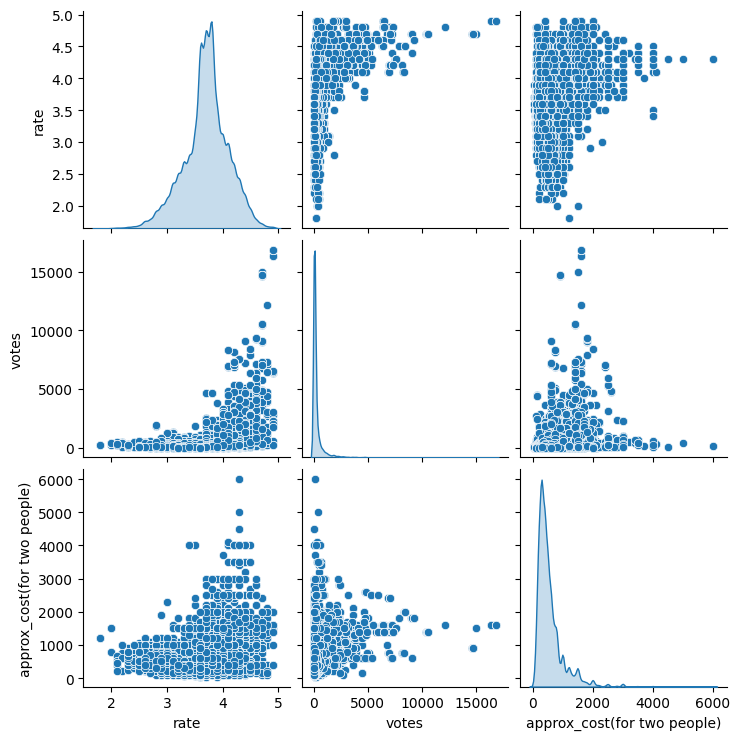

In [39]:
cols_for_matrix = ['rate', 'votes', 'approx_cost(for two people)']
sns.pairplot(df[cols_for_matrix], diag_kind='kde')
plt.show()

Correlation Matrix: there's also no significant strong relationship

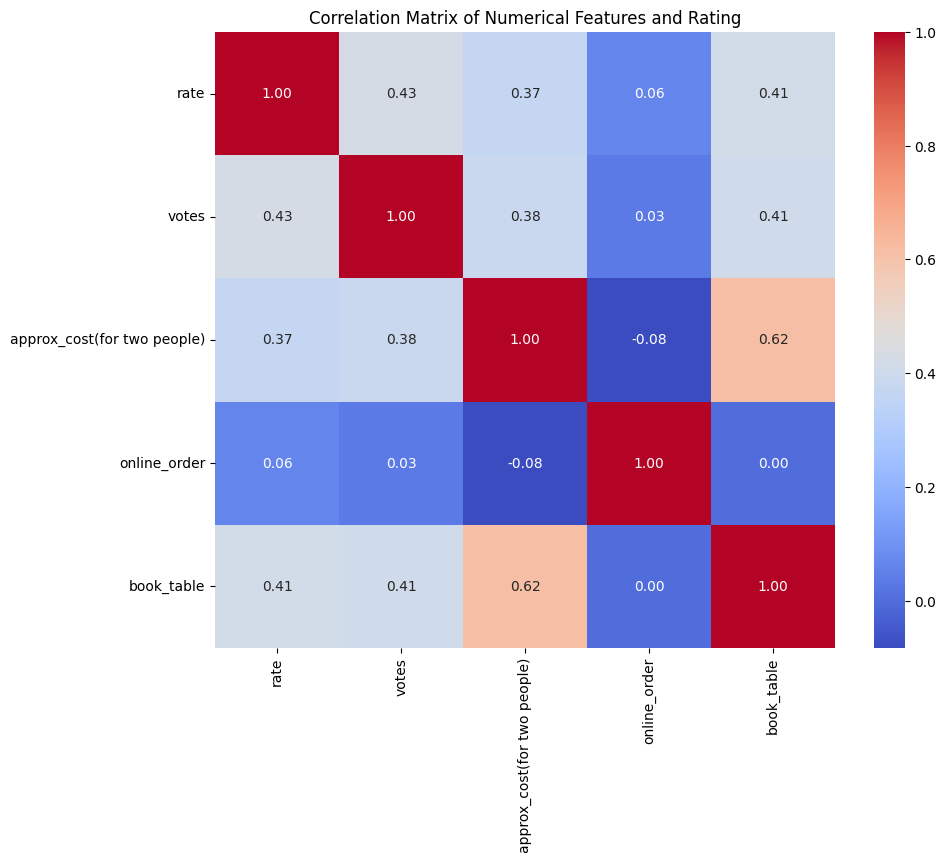

In [40]:
# Correlation matrix to understand relationships between numerical features and rating
correlation_matrix = df[['rate', 'votes', 'approx_cost(for two people)', 'online_order', 'book_table']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Rating')
plt.show()

Boxplots: using boxplots we can see that there are many outliers. However, they should not be removed as they are significant in our research and they do not represent wrong values or anomolies for example. It is normal to find a restauarant that is highly rate, that doesn't mean we should remove it. It is also logical that votes can vary hugely since restauarants that have high publicity usually have many people voting for them. Same concept applies for cost, sometimes we have high-priced restauarants that deviate from the normal ranges.

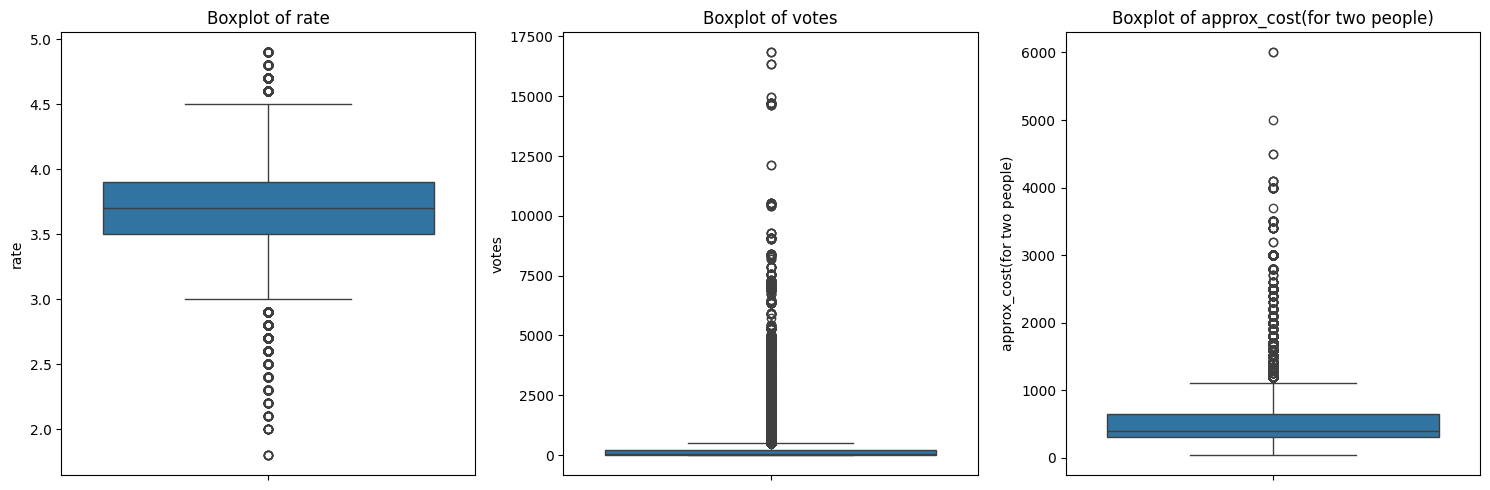

In [41]:
# Create boxplots for the different numeric features
numeric_features = ['rate', 'votes', 'approx_cost(for two people)']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Percentage of outliers: not that huge, and will help us in getting insights about high-priced luxurious restauarants for example.

In [42]:
def find_outlier_percentage(df, numeric_features):
    outlier_percentages = {}
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        outlier_percentages[feature] = outlier_percentage

    return outlier_percentages


numeric_features = ['rate', 'votes', 'approx_cost(for two people)']
outlier_percentages = find_outlier_percentage(df, numeric_features)
outlier_percentages

{'rate': 5.505883263663105,
 'votes': 13.469577333952623,
 'approx_cost(for two people)': 9.266140269391547}

## Distribution of boolean features

Countplot: from the countplot we can see that the distribution of online order is almost similar since in India we expect online ordering to be available in many restauarants, but table booking is complete opposite since no table booking is quite a lot. Looking at the bar plot for boolean features vs rate tells us also that online ordering does not affect rate, however table booking does.

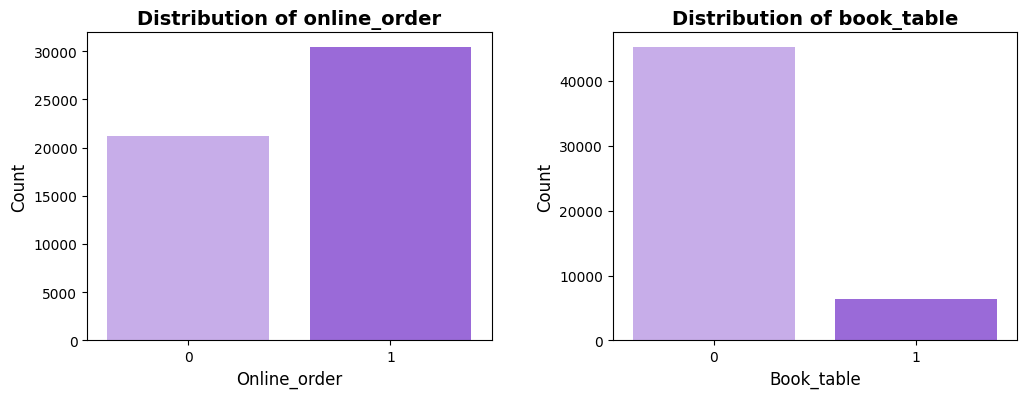

In [43]:
custom_palette_purple = ['#c6a3f3', '#9858ea']

binary_cols = ['online_order', 'book_table']

fig, axes = plt.subplots(1, len(binary_cols), figsize=(12, 4))

# Loop through the binary columns and plot on respective axes
for i, col in enumerate(binary_cols):
    sns.countplot(
        x=col,
        data=df,
        hue=col,
        palette=custom_palette_purple,
        dodge=False,  # Keeps bars in one group
        legend=False,  # Removes redundant legends
        ax=axes[i]  # Plot each chart on its respective axis
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout to ensure the plots don't overlap
plt.subplots_adjust(wspace=0.3)
plt.show()


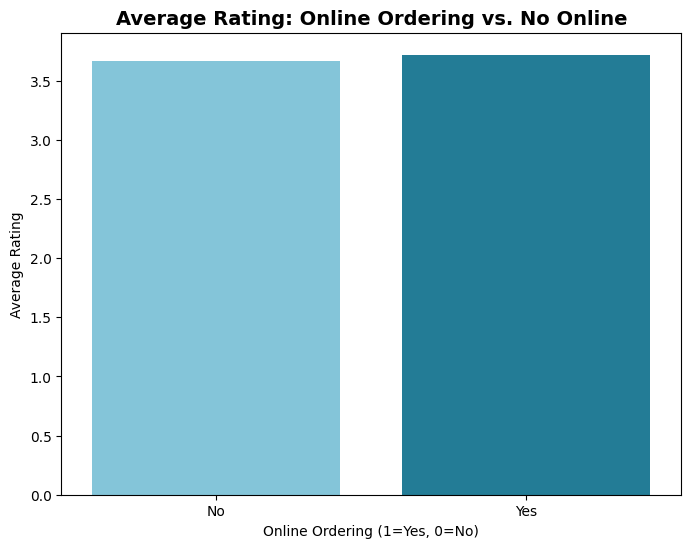

In [44]:
color_palette_blue = ['#76cde7', '#1086a9']
rates_by_booking = df.groupby('online_order')['rate'].mean()

plt.figure(figsize=(8, 6))

sns.barplot(x=rates_by_booking.index,
            y=rates_by_booking.values,
            palette=color_palette_blue ,
            hue=rates_by_booking.index,
            legend=False) #note: palette can't be used without hue so that how to do it in newer versions of sns

plt.title('Average Rating: Online Ordering vs. No Online', fontsize=14, fontweight='bold')
plt.xlabel('Online Ordering (1=Yes, 0=No)')
plt.ylabel('Average Rating')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()

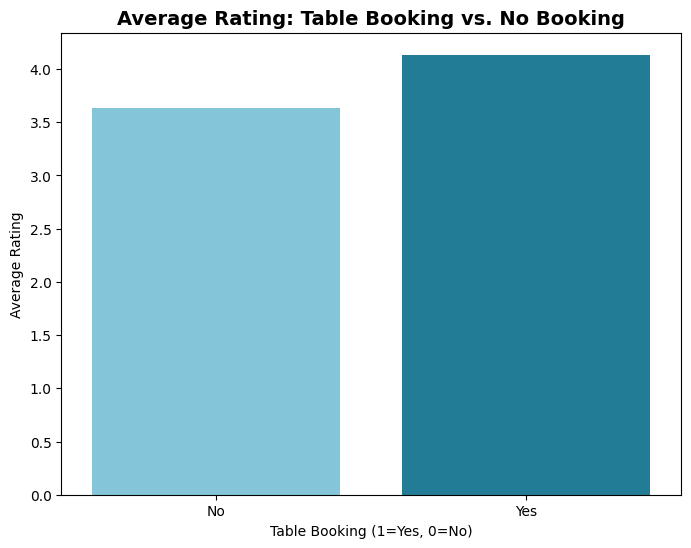

In [45]:
rates_by_booking = df.groupby('book_table')['rate'].mean()


plt.figure(figsize=(8, 6))

sns.barplot(x=rates_by_booking.index,
            y=rates_by_booking.values,
            palette=color_palette_blue ,
            hue=rates_by_booking.index,
            legend=False) #note: palette can't be used without hue so that how to do it in newer versions of sns

plt.title('Average Rating: Table Booking vs. No Booking', fontsize=14, fontweight='bold')
plt.xlabel('Table Booking (1=Yes, 0=No)')
plt.ylabel('Average Rating')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()


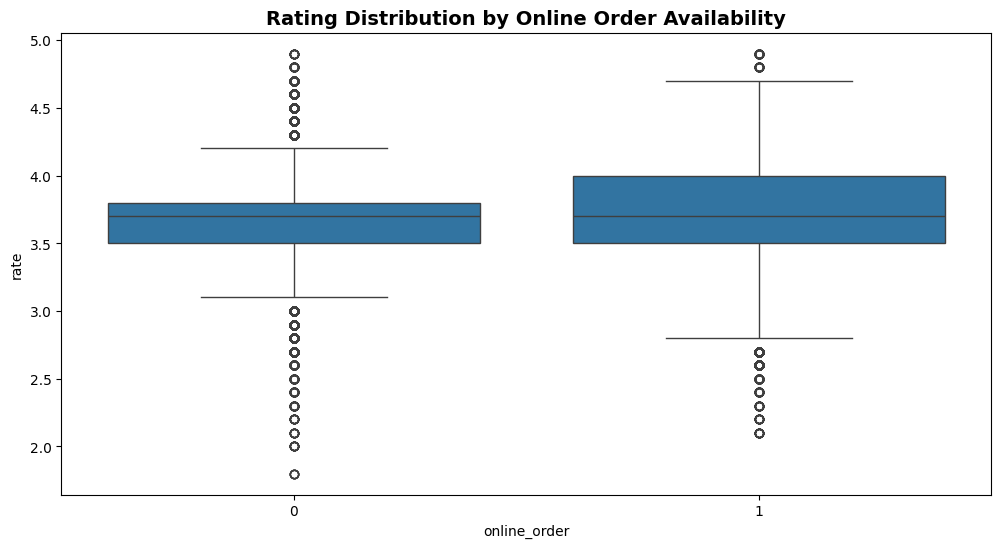

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating Distribution by Online Order Availability', fontsize=14, fontweight='bold')
plt.show()

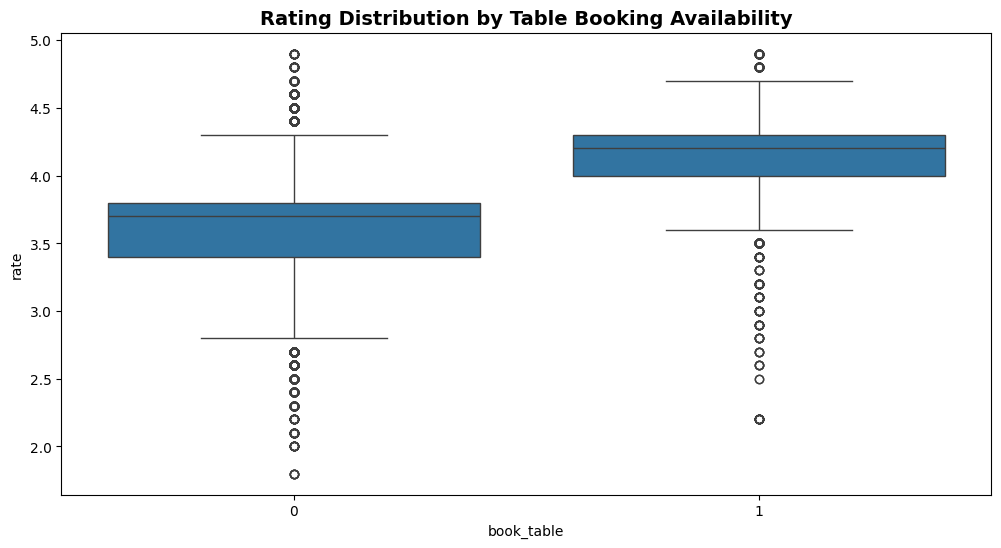

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Rating Distribution by Table Booking Availability', fontsize=14, fontweight='bold')
plt.show()

## location vs count, rate, cost

Looking at these visualizations, we can see that the count of restauarants varies per city, however the rate is not affected by the city that much. There is a relationship that is found which is that the cities that have the highest ratings have the highest cost. The top 5 in average rating are the same as the top 5 in cost which could hint that when the cost is high, the customer will probably get food that is of good quality, so the rate will be high.

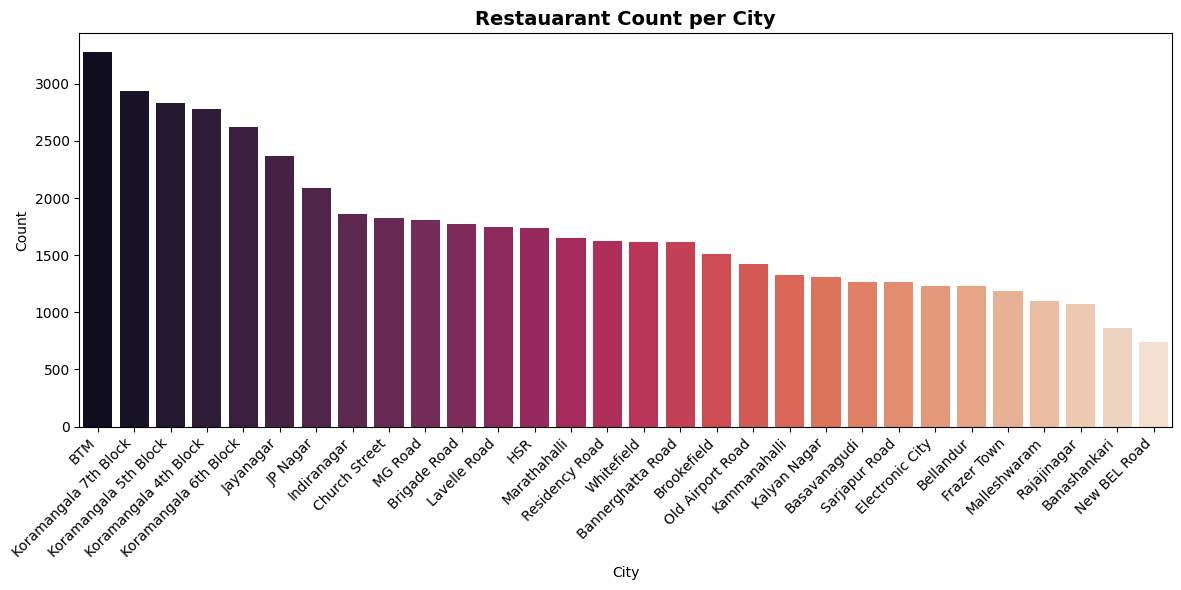

In [48]:
# Group by 'listed_in(city)' and calculate the average rating
restaurant_count = df.groupby('listed_in(city)')['name'].count()

# sort descendingly
restaurant_count = restaurant_count.sort_values(ascending=False)

# Create the bar plot with a custom color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=restaurant_count.index, y=restaurant_count.values, palette='rocket')
plt.title('Restauarant Count per City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


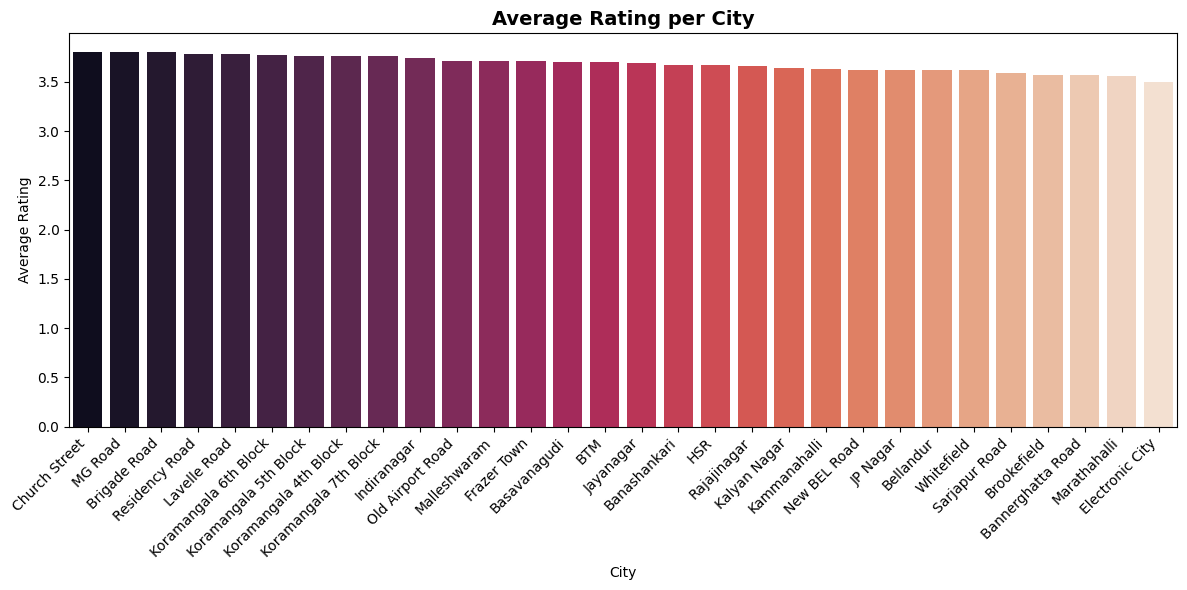

In [49]:
# Group by 'listed_in(city)' and calculate the average rating
average_ratings = df.groupby('listed_in(city)')['rate'].mean()

# Sort the average ratings in descending order
average_ratings = average_ratings.sort_values(ascending=False)

# Create the bar plot with a custom color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='rocket')
plt.title('Average Rating per City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

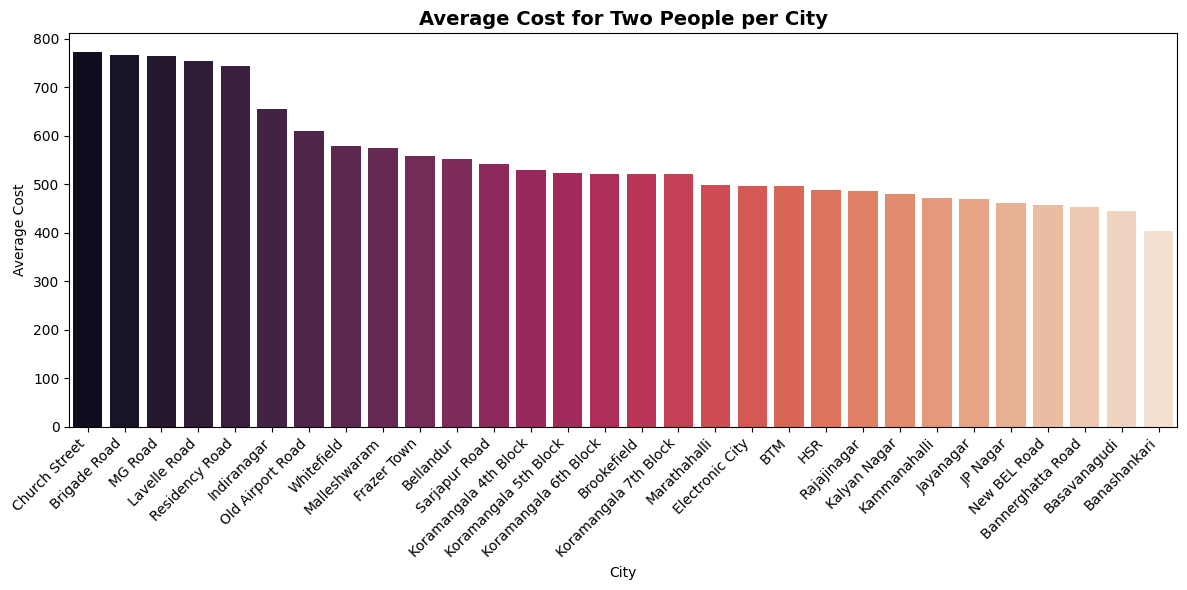

In [50]:
# Calculate average cost per city
average_cost_per_city = df.groupby('listed_in(city)')['approx_cost(for two people)'].mean()

# Sort cities by average cost in descending order
average_cost_per_city = average_cost_per_city.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_cost_per_city.index, y=average_cost_per_city.values, palette='rocket')
plt.title('Average Cost for Two People per City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Possible research question/insight: Does a high average cost among the top cities result in a high rate?**

Answer: Yes. The top 5 cities with highest cost have an average of around 700-800. Their rate is also the highest among the other cities. Even if the rate differences are very minimal, it could still be considered an insight on how cost affects the top cities.

## restaurant type distribution

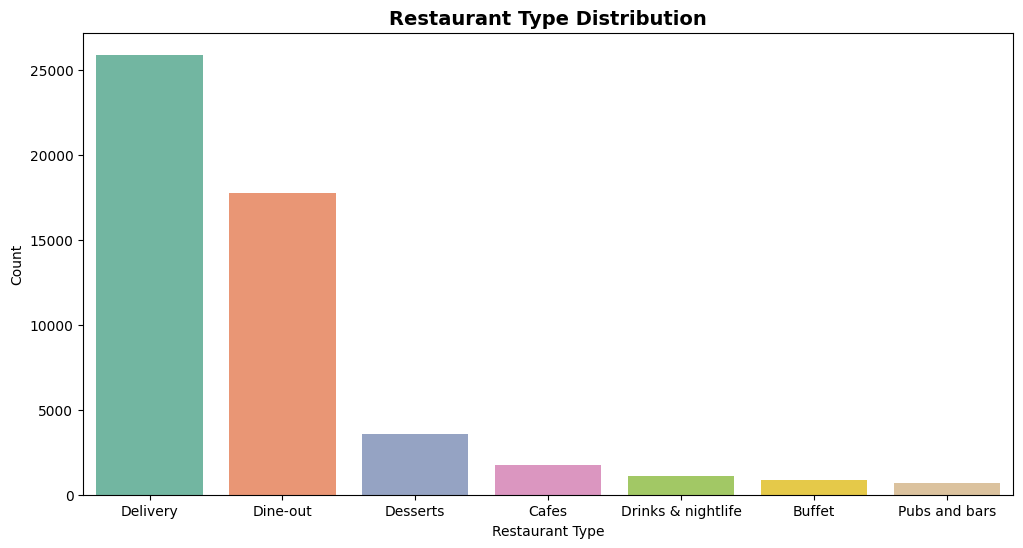

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index, palette='Set2')
plt.xticks(rotation=0, ha='center')
plt.title('Restaurant Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

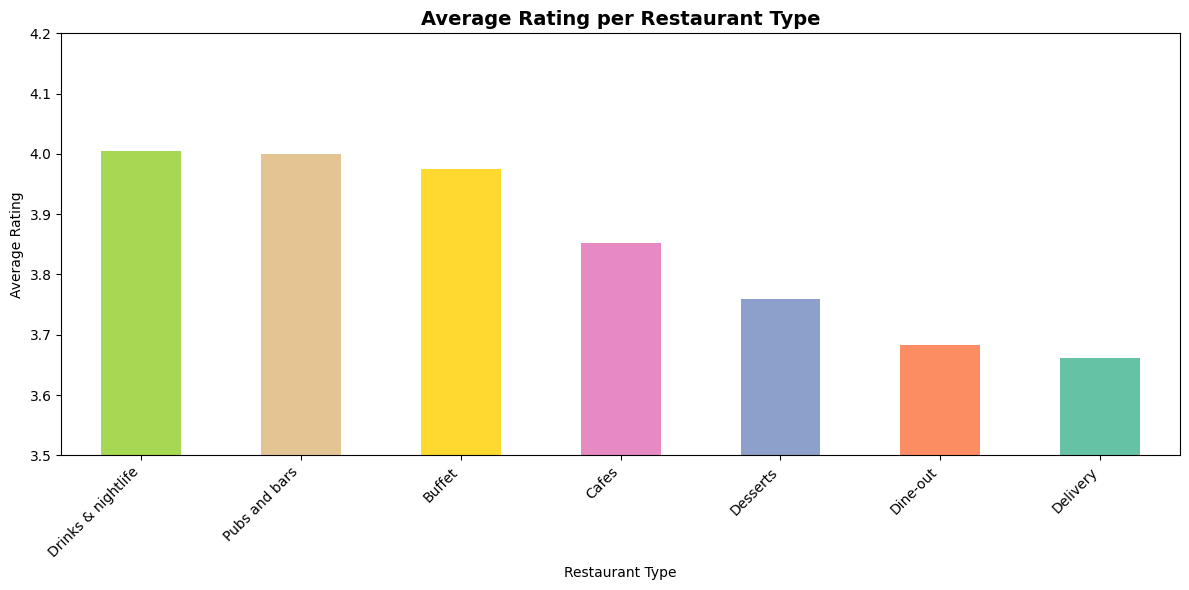

In [52]:
# Extract the colors from the 'Set2' palette based on the restaurant types
palette = sns.color_palette('Set2', n_colors=len(df['listed_in(type)'].value_counts().index))
type_to_color = dict(zip(df['listed_in(type)'].value_counts().index, palette))


plt.figure(figsize=(12, 6))
average_rates_by_type = df.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

# Map colors from the 'type_to_color' dictionary to each restaurant type
colors = [type_to_color[t] for t in average_rates_by_type.index]

average_rates_by_type.plot(kind='bar', color=colors)

plt.ylim(3.5, 4.2)
plt.title('Average Rating per Restaurant Type', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

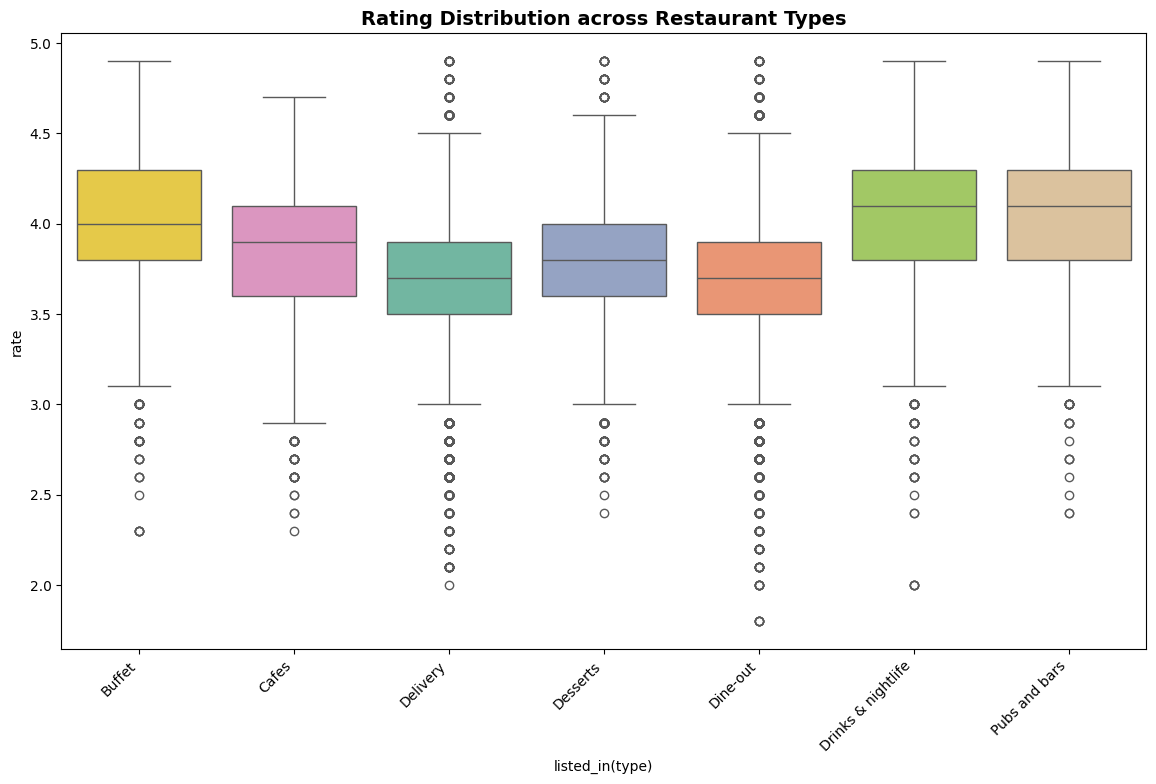

In [150]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='listed_in(type)', y='rate', data=df, palette=type_to_color)
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution across Restaurant Types', fontsize=14, fontweight='bold')
plt.show()

**Possible Research Question/ Insight: Does a high occurence of a specific restauarant type indicate better rate?**

Answer: No. Here we can see how delivery has the most number of restauarants, however in rating, it is the worst. Similarly, drinks&nightlife, pubs&bars, and buffet have a very low count, but their rate is very high because they provide high-quality food.

# Visualizations and Research Questions

In this section, we will try to answer research questions using visualizations.

## Research Question 1: What contributes to a high rate in major cities?

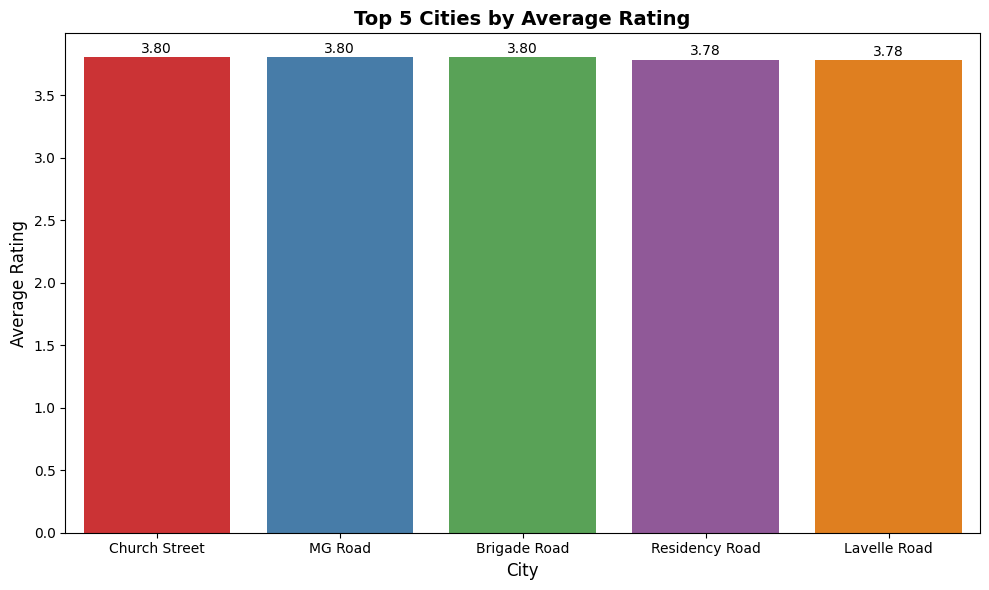

In [166]:
# Group data by city and calculate the mean rating
average_ratings_by_city = df.groupby('listed_in(city)')['rate'].mean()

# Sort cities by average rating in descending order and get the top 5
top_5_cities = average_ratings_by_city.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_5_cities.index,
    y=top_5_cities.values,
    palette='Set1'
)

# Add values on top of the bars
for i, value in enumerate(top_5_cities.values):
    ax.text(
        i,
        value + 0.01,  # Slightly above the bar
        f"{value:.2f}",  # Format to 2 decimal places
        ha="center",
        va="bottom",
        fontsize=10
    )

# Add labels and title
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Top 5 Cities by Average Rating", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

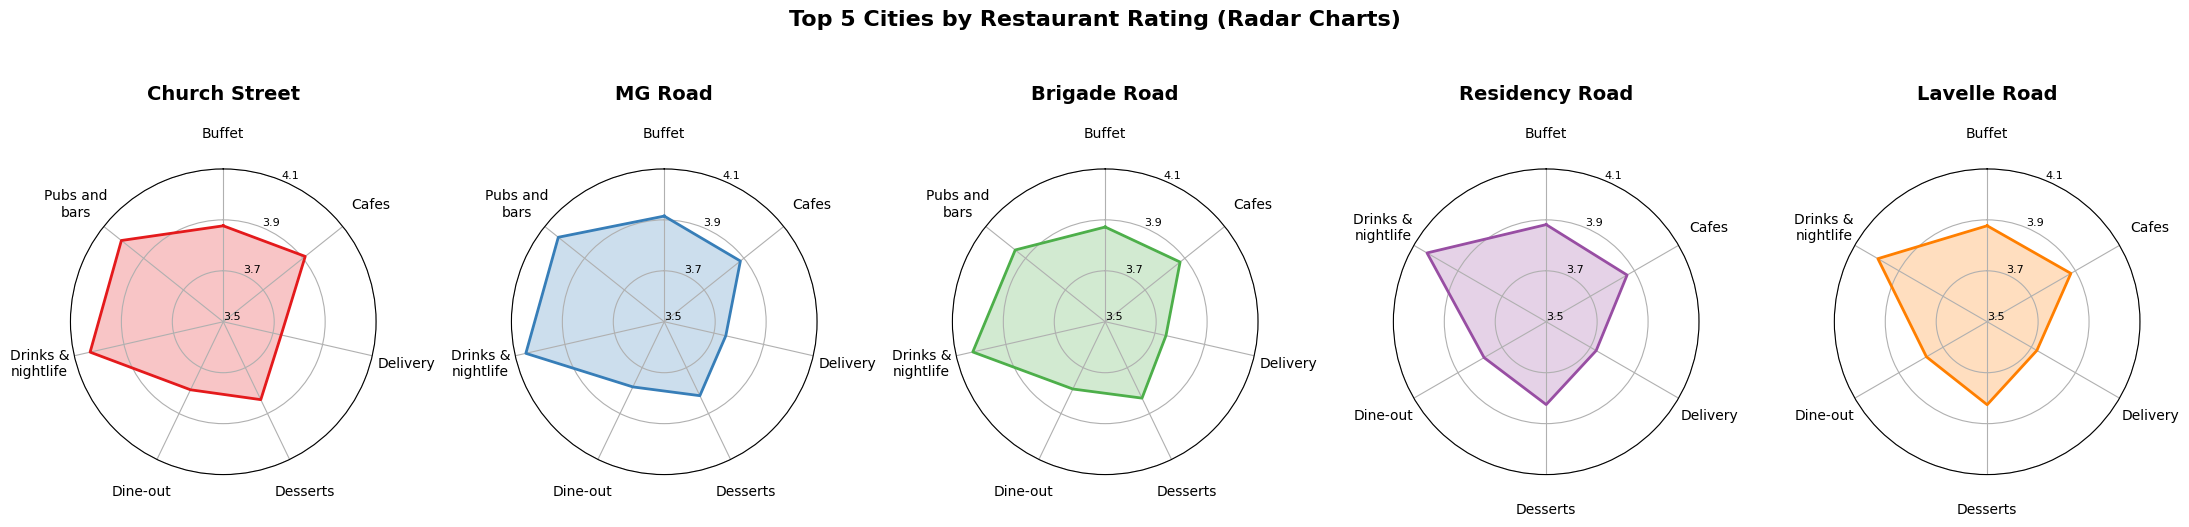

In [165]:
# Group data by city and calculate the mean rating
average_ratings_by_city = df.groupby('listed_in(city)')['rate'].mean()

# Sort cities by average rating in descending order and get the top 5
top_5_cities = average_ratings_by_city.sort_values(ascending=False).head(5)

# Now find the listed_in(type) with the highest average rating in each of the top 5 cities
for city in top_5_cities.index:
    city_df = df[df['listed_in(city)'] == city]
    highest_rated_type = city_df.groupby('listed_in(type)')['rate'].mean().idxmax()

# Function to create radar charts with adjusted radial range
def plot_adjusted_radar_chart(city, data, ax, color):
    restaurant_types = data.columns
    values = data.iloc[0].values

    # Ensure the radar chart is a closed circle
    values = np.append(values, values[0])
    angles = np.linspace(0, 2 * np.pi, len(restaurant_types), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    # Draw the radar chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=city, color=color)  # Use color
    ax.fill(angles, values, alpha=0.25, color=color)  # Fill with color

    # Adjust restaurant type names to split long ones into two lines
    formatted_labels = [textwrap.fill(label, 10) for label in restaurant_types]

    # Set the labels for each axis with line breaks if needed
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(formatted_labels, fontsize=9, ha='center', va='center')
    ax.tick_params(axis='x', labelsize=10, pad=15)

    # Adjust radial limits to a tighter range
    ax.set_yticks([3.5, 3.7, 3.9, 4.1])  # Custom ticks within the range
    ax.set_ylim(3.5, 4.1)  # Adjust minimum and maximum radial limits
    ax.set_yticklabels([3.5, 3.7, 3.9, 4.1], fontsize=8)
    ax.set_title(f"{city}", fontsize=14, pad=50,  fontweight='bold')  # Offset title to prevent overlap

# Generate the radar charts for each city with adjusted range
fig, axes = plt.subplots(1, 5, subplot_kw=dict(polar=True), figsize=(22, 5))

# Add a title to the entire figure at the top center
fig.suptitle('Top 5 Cities by Restaurant Rating (Radar Charts)', fontsize=16, y=1.05, fontweight='bold')

# Get the Seaborn color palette 'Set1' and adjust it to the number of cities
colors = sns.color_palette("Set1", n_colors=len(top_5_cities))

for i, city in enumerate(top_5_cities.index):
    city_data = df[df['listed_in(city)'] == city]  # Adjust to correct column names
    mean_ratings_by_type = city_data.groupby('listed_in(type)')['rate'].mean().to_frame().T  # Adjust 'type' column name

    plot_adjusted_radar_chart(city, mean_ratings_by_type, axes[i], color=colors[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


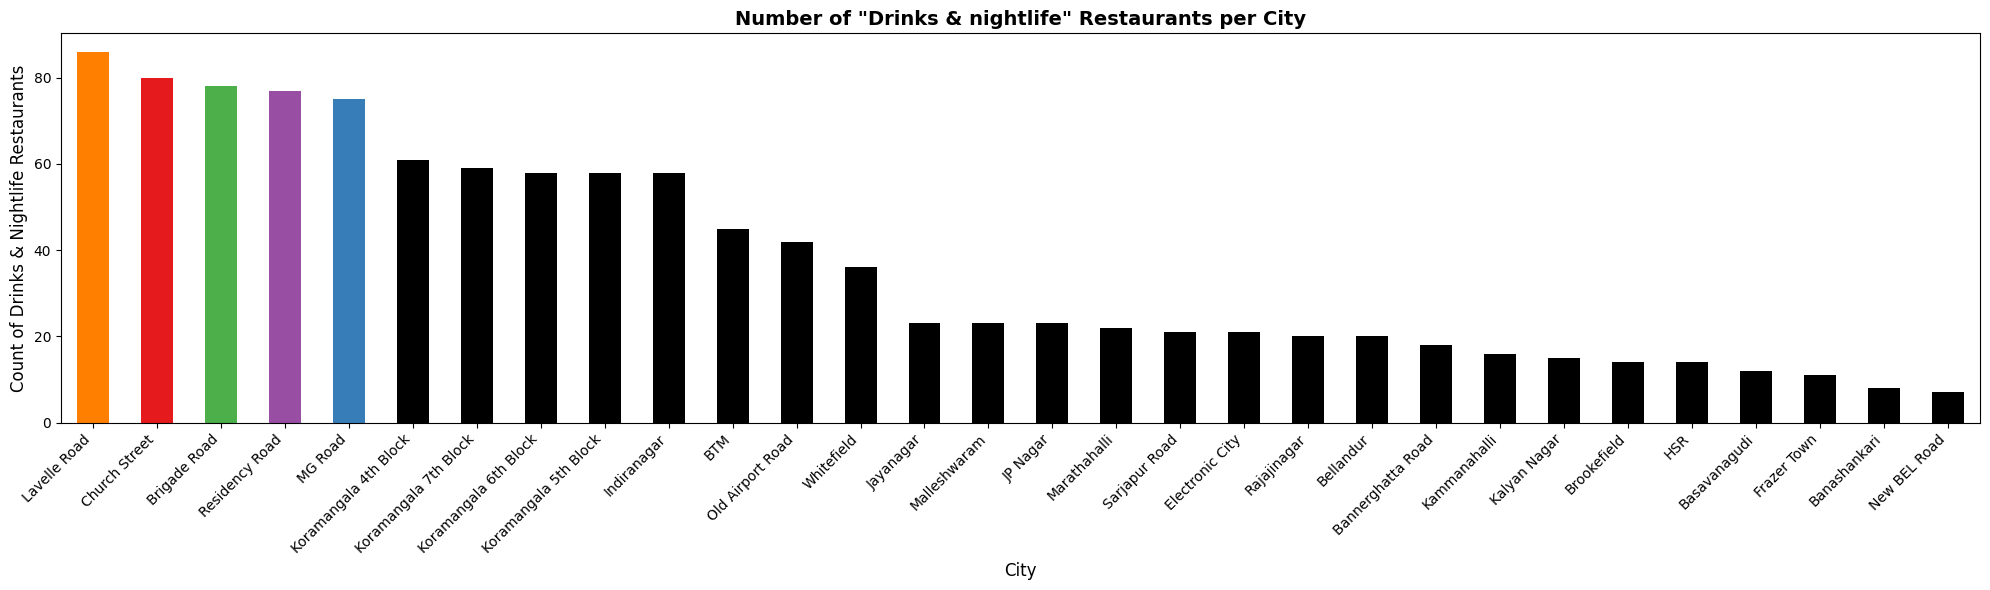

In [148]:
# Count occurrences of each restaurant type in each city
city_type_counts = df.groupby(['listed_in(city)', 'listed_in(type)'])['listed_in(type)'].count().unstack()

# Calculate the total count of each restaurant type across all cities
type_totals = city_type_counts.sum(axis=0)


# Select the 'Drinks & nightlife' type
drinks_nightlife_counts = city_type_counts['Drinks & nightlife'].sort_values(ascending=False)

# Define the colors used in the first chart
set1_palette = sns.color_palette('Set1', n_colors=len(top_5_cities))
city_colors = dict(zip(top_5_cities.index, set1_palette))

# Assign black as the default color for other cities
drinks_nightlife_colors = [
    city_colors.get(city, 'black') for city in drinks_nightlife_counts.index
]

# Create the bar chart with custom colors
plt.figure(figsize=(20, 6))
drinks_nightlife_counts.plot(
    kind='bar',
    color=drinks_nightlife_colors,  # Apply custom colors
)

# Add title and labels
plt.title('Number of "Drinks & nightlife" Restaurants per City',fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Count of Drinks & Nightlife Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


When looking at the top 5 rated restaurants, we notice that the highest rated restauarant type in these 5 cities is Drinks & Nightlife.
We also notice a pattern that these are also the top 5 cities having the highest count of restaurant types Drinks & Night life. This is also seen in the exploratory analysis where the abundance of delivery restaurants is very high and night life restaurants are very rare; however, the ratings of the Night life and Drinks restaurants are the highest among all types. The more cities have restaurants for drinks and nightlife, the higher their overall rate is since they affect the rate very strongly in comparison to other types. Here we saw how the cities that had the most drinks and nightlife are the same that had the highest overall rating.

## Research Question 2: How are restaurants segmented based on cost and rate? Why are there high-priced low-rated restaurants and why are there low-priced high-rated restaurants?

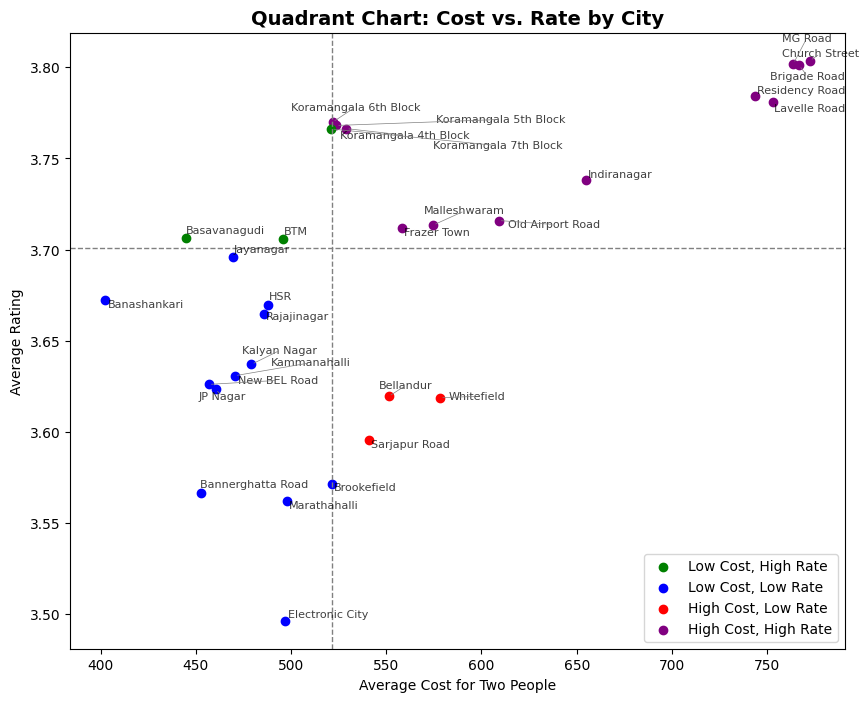

In [168]:
city_stats = df.groupby('listed_in(city)').agg({'approx_cost(for two people)': 'mean', 'rate': 'mean'})
# Define thresholds for cost and rate
cost_threshold = city_stats['approx_cost(for two people)'].median()
rate_threshold = city_stats['rate'].median()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# List for storing text annotations
texts = []

# Iterate through data to plot points in respective quadrants
for city, row in city_stats.iterrows():
    if row['approx_cost(for two people)'] <= cost_threshold and row['rate'] <= rate_threshold:
        color, label = 'blue', 'Low Cost, Low Rate'
    elif row['approx_cost(for two people)'] <= cost_threshold and row['rate'] > rate_threshold:
        color, label = 'green', 'Low Cost, High Rate'
    elif row['approx_cost(for two people)'] > cost_threshold and row['rate'] <= rate_threshold:
        color, label = 'red', 'High Cost, Low Rate'
    else:
        color, label = 'purple', 'High Cost, High Rate'

    # Plot each city
    ax.scatter(row['approx_cost(for two people)'], row['rate'], color=color, label=label)

    # Add text with smaller font size for denser clusters
    text = ax.text(row['approx_cost(for two people)'], row['rate'], city, fontsize=8, alpha=0.75)
    texts.append(text)

# Adjust text to avoid overlaps in dense areas
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
    expand_points=(1.5, 1.5),  # Expands the space around points
    expand_text=(1.5, 1.5),    # Expands space around labels
    force_text=(0.5, 0.5),     # Forces minimum separation between texts
    lim=20                     # Limits the number of adjustment iterations
)

# Draw quadrant dividers
ax.axvline(cost_threshold, color='gray', linestyle='--', linewidth=1)
ax.axhline(rate_threshold, color='gray', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Average Cost for Two People')
ax.set_ylabel('Average Rating')
ax.set_title('Quadrant Chart: Cost vs. Rate by City',fontsize=14, fontweight='bold')

# Add legend without duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower right')

# Show plot
plt.show()


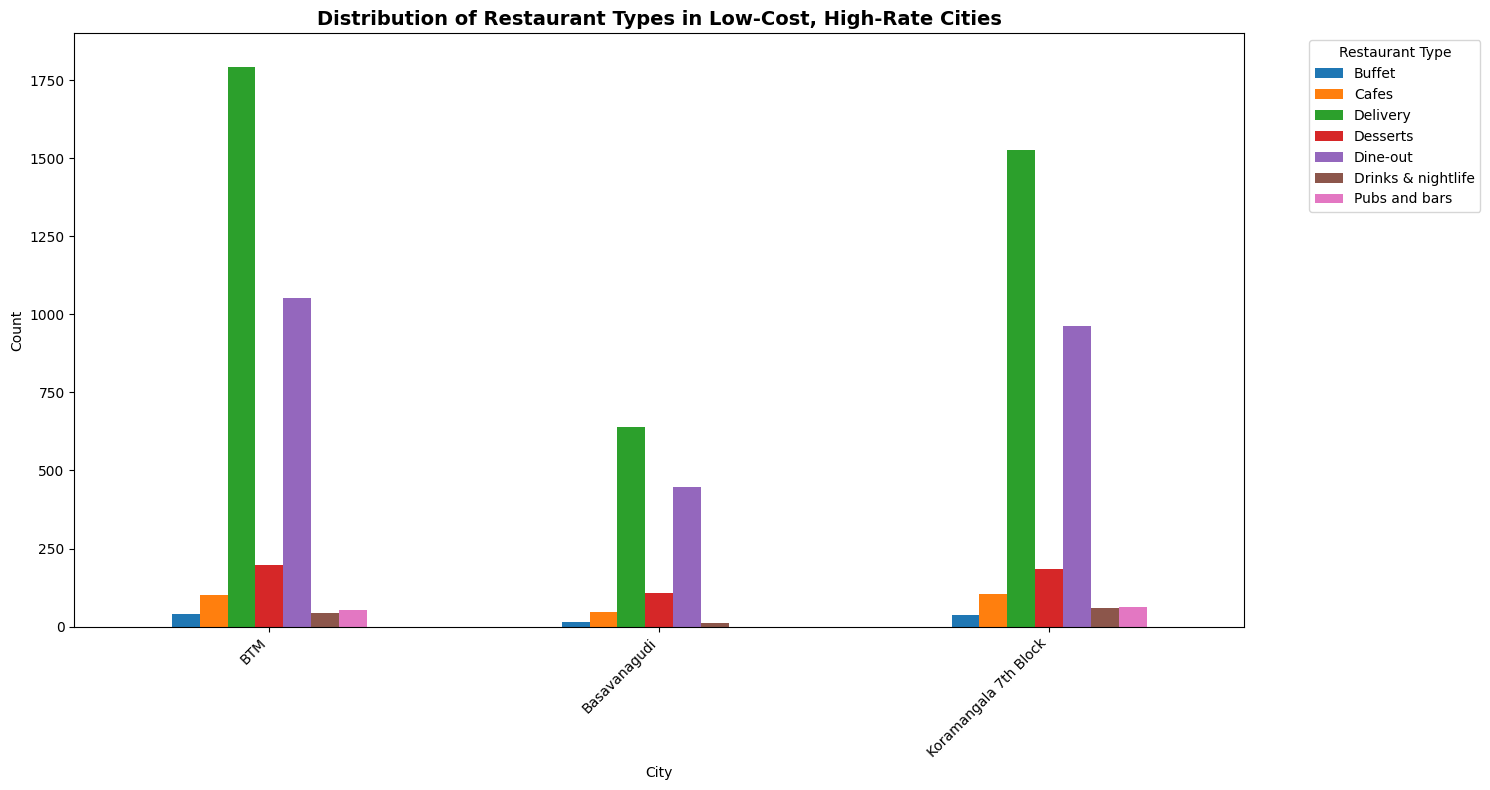

In [58]:
# Define thresholds (as in the previous code)
cost_threshold = city_stats['approx_cost(for two people)'].median()
rate_threshold = city_stats['rate'].median()

# Identify cities with low cost and high rate
low_cost_high_rate_cities = city_stats[
    (city_stats['approx_cost(for two people)'] <= cost_threshold) &
    (city_stats['rate'] > rate_threshold)
].index.tolist()

# Filter the DataFrame to include only the selected cities
filtered_df = df[df['listed_in(city)'].isin(low_cost_high_rate_cities)]

# Group by city and restaurant type and count the occurrences
restaurant_type_counts = filtered_df.groupby(['listed_in(city)', 'listed_in(type)'])['listed_in(city)'].count().unstack()

# Create the multiple bar chart
ax = restaurant_type_counts.plot(kind='bar', figsize=(15, 8))  # Adjust figsize as needed
plt.title('Distribution of Restaurant Types in Low-Cost, High-Rate Cities',fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count')
plt.ylim(0, 1900)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

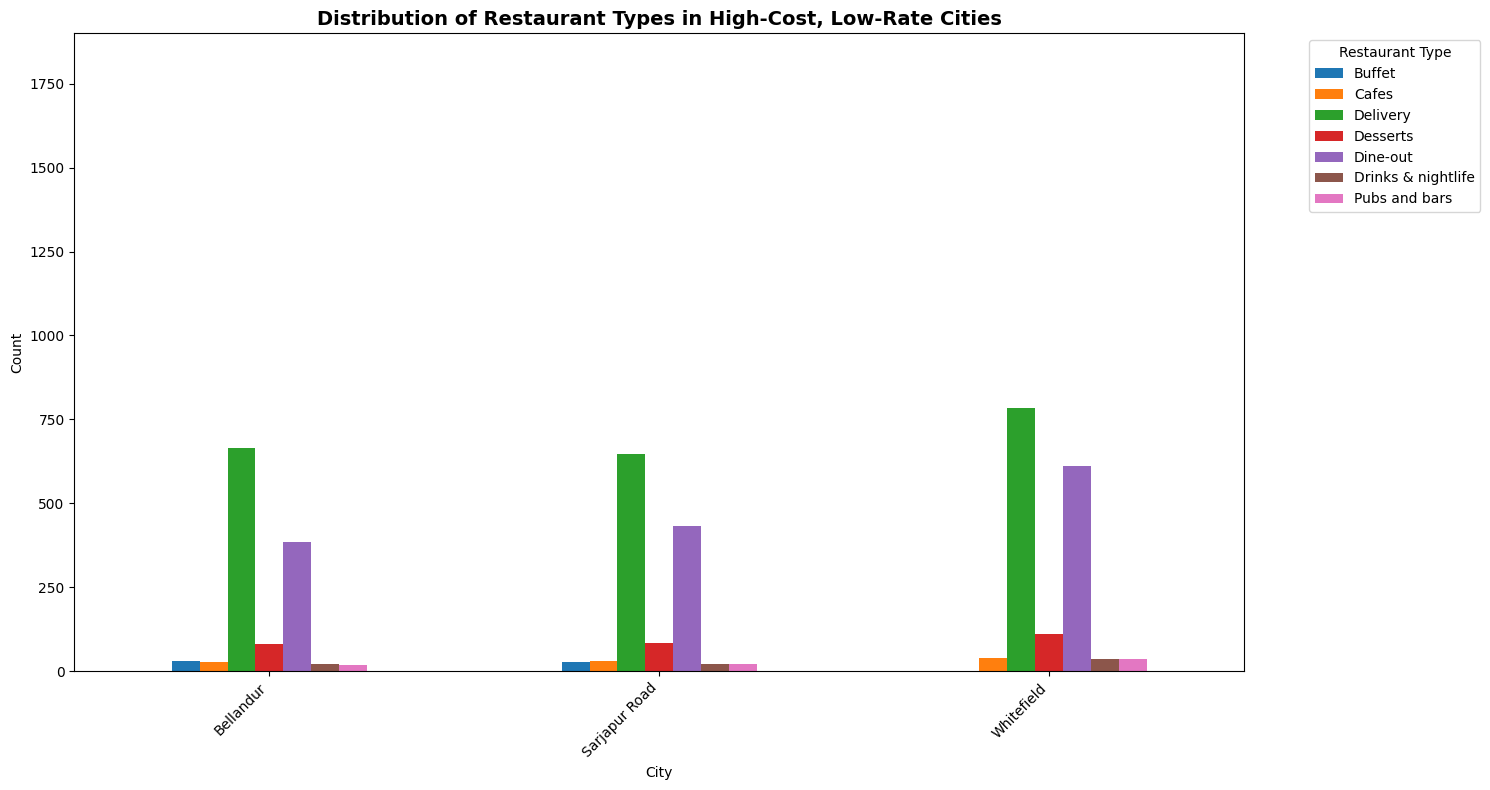

In [59]:
# Define thresholds (as in the previous code)
cost_threshold = city_stats['approx_cost(for two people)'].median()
rate_threshold = city_stats['rate'].median()

# Identify cities with low cost and high rate
low_cost_high_rate_cities = city_stats[
    (city_stats['approx_cost(for two people)'] > cost_threshold) &
    (city_stats['rate'] <= rate_threshold)
].index.tolist()

# Filter the DataFrame to include only the selected cities
filtered_df_2 = df[df['listed_in(city)'].isin(low_cost_high_rate_cities)]


# Group by city and restaurant type and count the occurrences
restaurant_type_counts = filtered_df_2.groupby(['listed_in(city)', 'listed_in(type)'])['listed_in(city)'].count().unstack()

# Create the multiple bar chart
ax = restaurant_type_counts.plot(kind='bar', figsize=(15, 8))  # Adjust figsize as needed
plt.title('Distribution of Restaurant Types in High-Cost, Low-Rate Cities', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count')
plt.ylim(0, 1900)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

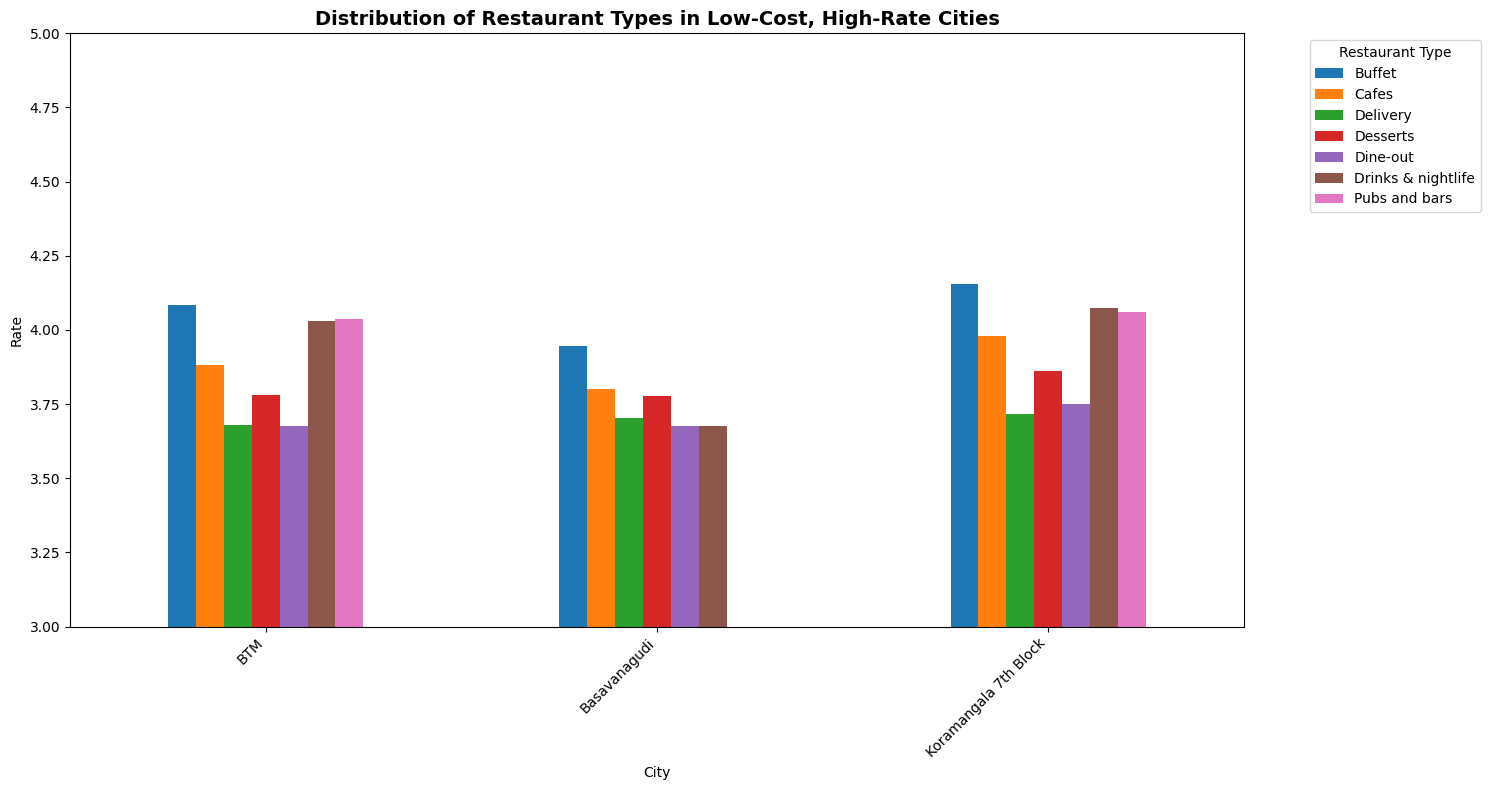

In [155]:
restaurant_type_mean = filtered_df.groupby(['listed_in(city)', 'listed_in(type)'])['rate'].mean().unstack()

# Create the multiple bar chart
ax = restaurant_type_mean.plot(kind='bar', figsize=(15, 8))  # Adjust figsize as needed
plt.title('Distribution of Restaurant Types in Low-Cost, High-Rate Cities',fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Rate')
ax.set_ylim(3, 5)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

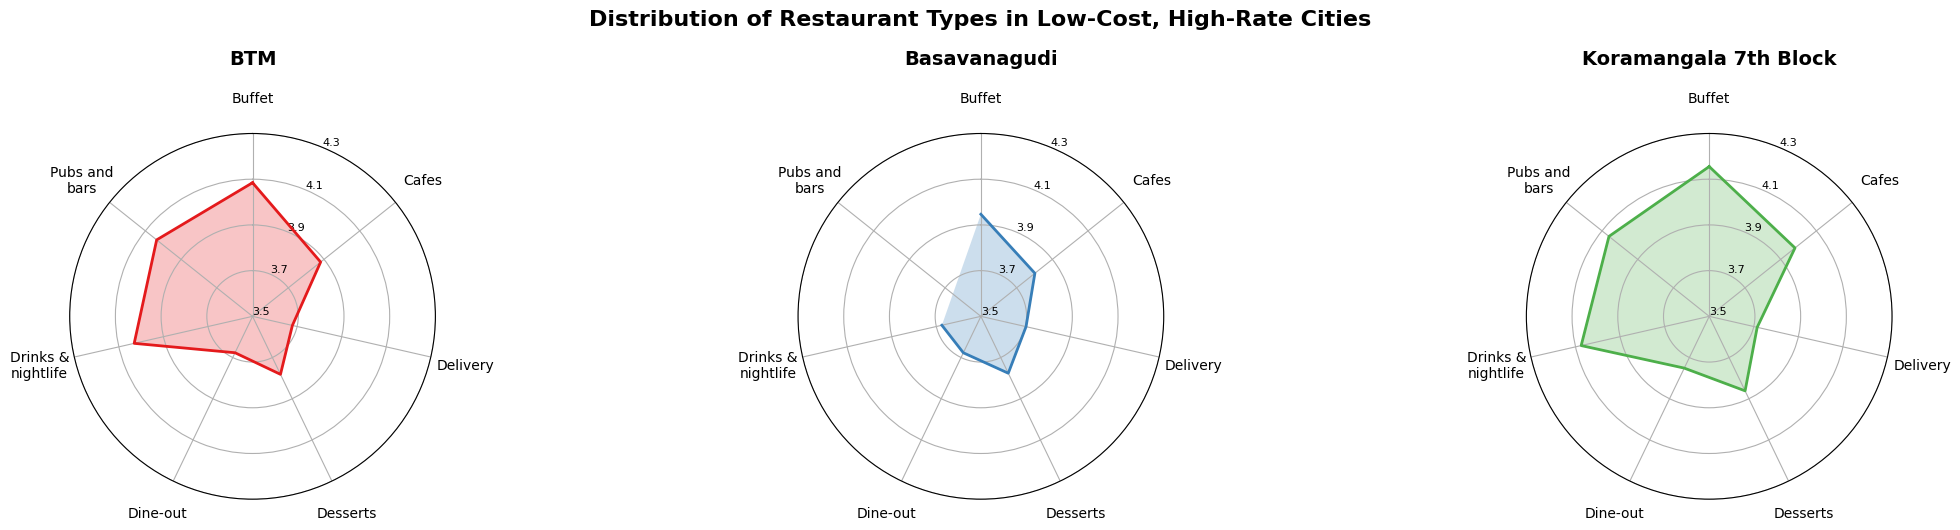

In [164]:
# Group the data by city and restaurant type, and calculate the mean rating
restaurant_type_mean = filtered_df.groupby(['listed_in(city)', 'listed_in(type)'])['rate'].mean().unstack()

# Function to create radar charts with adjusted radial range
def plot_adjusted_radar_chart(city, data, ax, color):
    restaurant_types = data.columns  # Get the columns (restaurant types)
    values = data.iloc[0].values  # Get the values (ratings)

    # Ensure the radar chart is a closed circle
    values = np.append(values, values[0])  # Close the circle
    angles = np.linspace(0, 2 * np.pi, len(restaurant_types), endpoint=False).tolist()  # Generate angles
    angles += angles[:1]  # Close the circle

    # Draw the radar chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=city, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

    # Adjust restaurant type names to split long ones into two lines
    formatted_labels = [textwrap.fill(label, 10) for label in restaurant_types]

    # Set the labels for each axis with line breaks if needed
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(formatted_labels, fontsize=9, ha='center', va='center')
    ax.tick_params(axis='x', labelsize=10, pad=15)

    # Adjust radial limits to a tighter range
    ax.set_yticks([3.5, 3.7, 3.9, 4.1, 4.3])  # Custom ticks within the range
    ax.set_ylim(3.5, 4.3)  # Adjust minimum and maximum radial limits
    ax.set_yticklabels([3.5, 3.7, 3.9, 4.1, 4.3], fontsize=8)
    ax.set_title(f"{city}", fontsize=14, pad=50,  fontweight='bold')  # Offset title to prevent overlap

# Create the radar charts for each city
fig, axes = plt.subplots(1, len(restaurant_type_mean.index), subplot_kw=dict(polar=True), figsize=(22, 5))

# Get the Seaborn color palette 'Set1' and adjust it to the number of cities
colors = sns.color_palette("Set1", n_colors=len(restaurant_type_mean.index))

# Plot radar charts for each city
for i, city in enumerate(restaurant_type_mean.index):
    city_data = restaurant_type_mean.loc[city]  # This returns a Series
    city_data = city_data.to_frame().T  # Convert Series to DataFrame with one row
    plot_adjusted_radar_chart(city, city_data, axes[i], color=colors[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.suptitle('Distribution of Restaurant Types in Low-Cost, High-Rate Cities', fontsize=16, y=1.05, fontweight='bold')
plt.show()


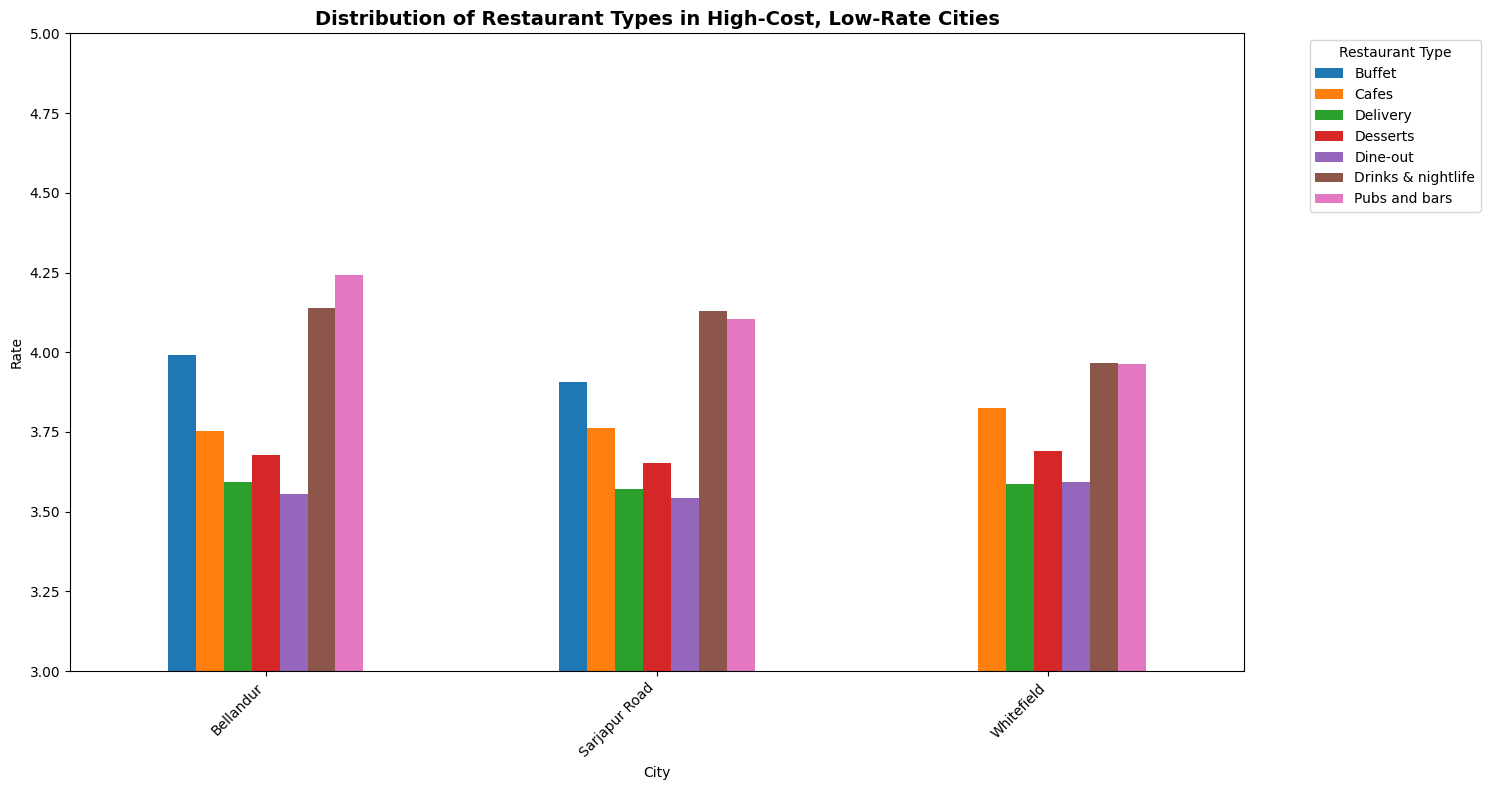

In [61]:
restaurant_type_mean = filtered_df_2.groupby(['listed_in(city)', 'listed_in(type)'])['rate'].mean().unstack()

# Create the multiple bar chart
ax = restaurant_type_mean.plot(kind='bar', figsize=(15, 8))  # Adjust figsize as needed
plt.title('Distribution of Restaurant Types in High-Cost, Low-Rate Cities',fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Rate')
ax.set_ylim(3, 5)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout()
plt.show()

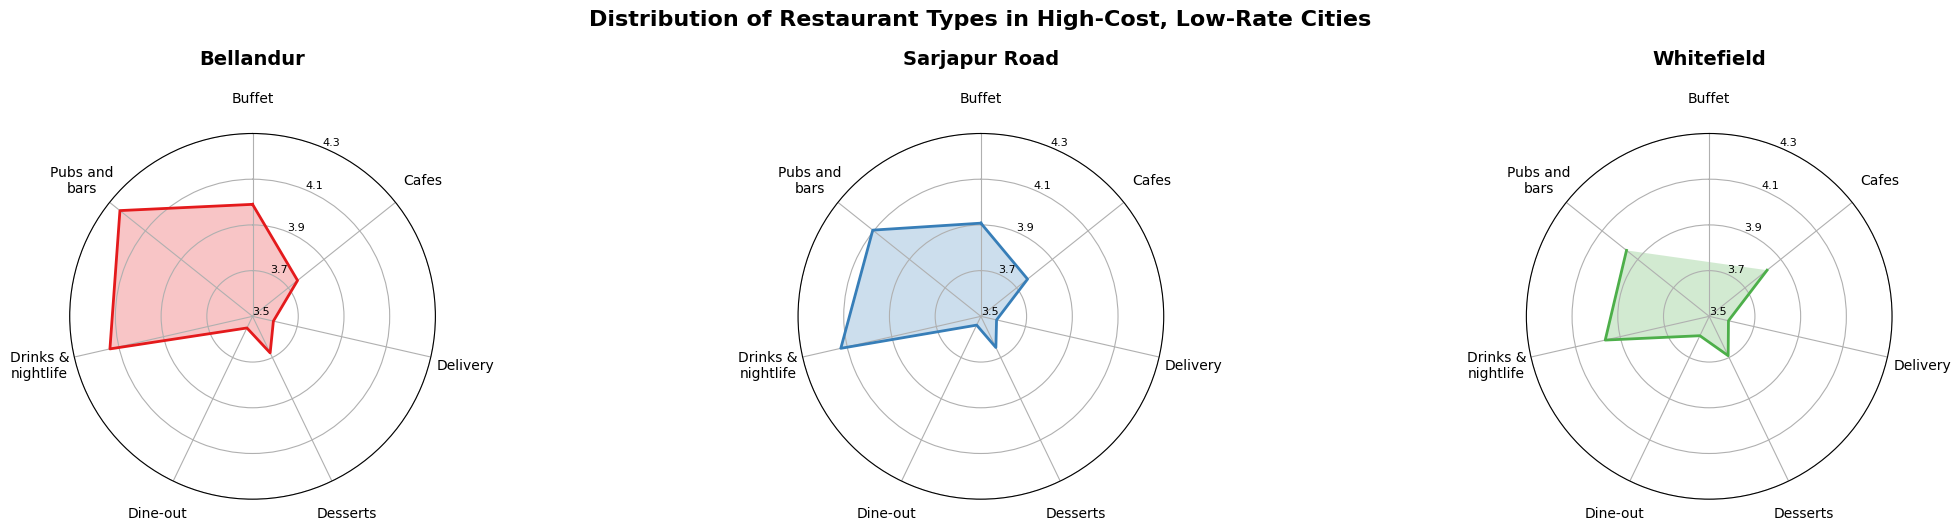

In [163]:
# Group the data by city and restaurant type, and calculate the mean rating
restaurant_type_mean = filtered_df_2.groupby(['listed_in(city)', 'listed_in(type)'])['rate'].mean().unstack()

# Function to create radar charts with adjusted radial range
def plot_adjusted_radar_chart(city, data, ax, color):
    restaurant_types = data.columns  # Get the columns (restaurant types)
    values = data.iloc[0].values  # Get the values (ratings)

    # Ensure the radar chart is a closed circle
    values = np.append(values, values[0])  # Close the circle
    angles = np.linspace(0, 2 * np.pi, len(restaurant_types), endpoint=False).tolist()  # Generate angles
    angles += angles[:1]  # Close the circle

    # Draw the radar chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=city, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

    # Adjust restaurant type names to split long ones into two lines
    formatted_labels = [textwrap.fill(label, 10) for label in restaurant_types]

    # Set the labels for each axis with line breaks if needed
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(formatted_labels, fontsize=9, ha='center', va='center')
    ax.tick_params(axis='x', labelsize=10, pad=15)

    # Adjust radial limits to a tighter range
    ax.set_yticks([3.5, 3.7, 3.9, 4.1, 4.3])  # Custom ticks within the range
    ax.set_ylim(3.5, 4.3)  # Adjust minimum and maximum radial limits
    ax.set_yticklabels([3.5, 3.7, 3.9, 4.1, 4.3], fontsize=8)
    ax.set_title(f"{city}", fontsize=14, pad=50, fontweight='bold')  # Offset title to prevent overlap

# Create the radar charts for each city
fig, axes = plt.subplots(1, len(restaurant_type_mean.index), subplot_kw=dict(polar=True), figsize=(22, 5))

# Get the Seaborn color palette 'Set1' and adjust it to the number of cities
colors = sns.color_palette("Set1", n_colors=len(restaurant_type_mean.index))

# Plot radar charts for each city
for i, city in enumerate(restaurant_type_mean.index):
    city_data = restaurant_type_mean.loc[city]  # This returns a Series
    city_data = city_data.to_frame().T  # Convert Series to DataFrame with one row
    plot_adjusted_radar_chart(city, city_data, axes[i], color=colors[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.suptitle('Distribution of Restaurant Types in High-Cost, Low-Rate Cities', fontsize=16, y=1.05, fontweight='bold')
plt.show()



In [62]:
# Define thresholds (as in the previous code)
cost_threshold = city_stats['approx_cost(for two people)'].median()
rate_threshold = city_stats['rate'].median()

# Function to process data for a given cost/rate quadrant
def analyze_quadrant(df, cost_condition, rate_condition, quadrant_name):
    filtered_df = df[cost_condition & rate_condition]
    restaurant_type_counts = filtered_df.groupby('listed_in(type)')['listed_in(city)'].count()
    restaurant_type_avg_rate = filtered_df.groupby('listed_in(type)')['rate'].mean()
    estaurant_type_avg_cost = filtered_df.groupby('listed_in(type)')['approx_cost(for two people)'].mean()
    return restaurant_type_counts, restaurant_type_avg_rate, estaurant_type_avg_cost

# Analyze Low Cost, High Rate
low_cost_high_rate_counts, low_cost_high_rate_avg_rate, low_cost_high_rate_avg_cost = analyze_quadrant(
    df,
    df['approx_cost(for two people)'] <= cost_threshold,
    df['rate'] > rate_threshold,
    "Low Cost, High Rate"
)

# Analyze High Cost, Low Rate
high_cost_low_rate_counts, high_cost_low_rate_avg_rate, high_cost_low_rate_avg_cost  = analyze_quadrant(
    df,
    df['approx_cost(for two people)'] > cost_threshold,
    df['rate'] <= rate_threshold,
    "High Cost, Low Rate"
)

# Combine results into DataFrames for easier comparison
results_low = pd.DataFrame({'Count': low_cost_high_rate_counts, 'Average Rate': low_cost_high_rate_avg_rate, 'Average Cost': low_cost_high_rate_avg_cost})
results_high = pd.DataFrame({'Count': high_cost_low_rate_counts, 'Average Rate': high_cost_low_rate_avg_rate, 'Average Cost': high_cost_low_rate_avg_cost})

# Print or further process the results
print("Low Cost, High Rate Restaurants:")
print(results_low)

print("\nHigh Cost, Low Rate Restaurants:")
print(results_high)

Low Cost, High Rate Restaurants:
                    Count  Average Rate  Average Cost
listed_in(type)                                      
Buffet                 16      3.981250    474.876530
Cafes                 312      3.989744    409.829238
Delivery             6399      3.934224    335.267352
Desserts             1403      4.007056    336.678008
Dine-out             3478      3.905377    324.211593
Drinks & nightlife      3      3.833333    499.341494
Pubs and bars          10      3.920000    300.000000

High Cost, Low Rate Restaurants:
                    Count  Average Rate  Average Cost
listed_in(type)                                      
Buffet                183      3.293989    991.256831
Cafes                 235      3.406383    704.973086
Delivery             2796      3.376180    702.933892
Desserts              147      3.463265    727.984646
Dine-out             2385      3.363564    813.110968
Drinks & nightlife    233      3.378541   1282.832618
Pubs and bars  

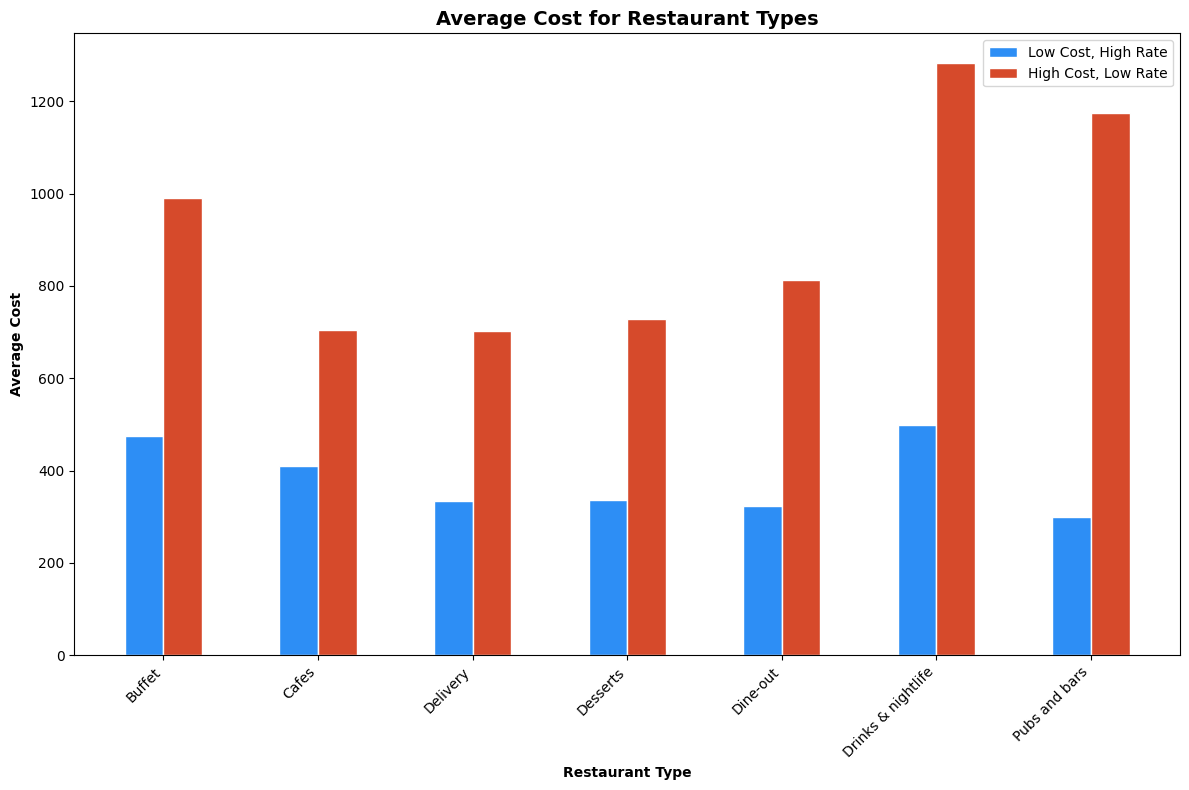

In [63]:
# get cost per category
categories = results_low.index
low_cost_high_rate = results_low['Average Cost'] # Example data
high_cost_low_rate = results_high['Average Cost'] # Example data

# Create the bar chart
barWidth = 0.25
r1 = range(len(categories))
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(12, 8))  # Adjust the figure size for better visualization

plt.bar(r1, low_cost_high_rate, width=barWidth, edgecolor='white', label='Low Cost, High Rate', color='#2d8ef5')
plt.bar(r2, high_cost_low_rate, width=barWidth, edgecolor='white', label='High Cost, Low Rate', color='#d64a2b')


# Add labels and title
plt.xlabel('Restaurant Type', fontweight='bold')
plt.ylabel('Average Cost', fontweight='bold')
plt.title('Average Cost for Restaurant Types',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(categories))], categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout() # Prevents labels from overlapping
plt.show()

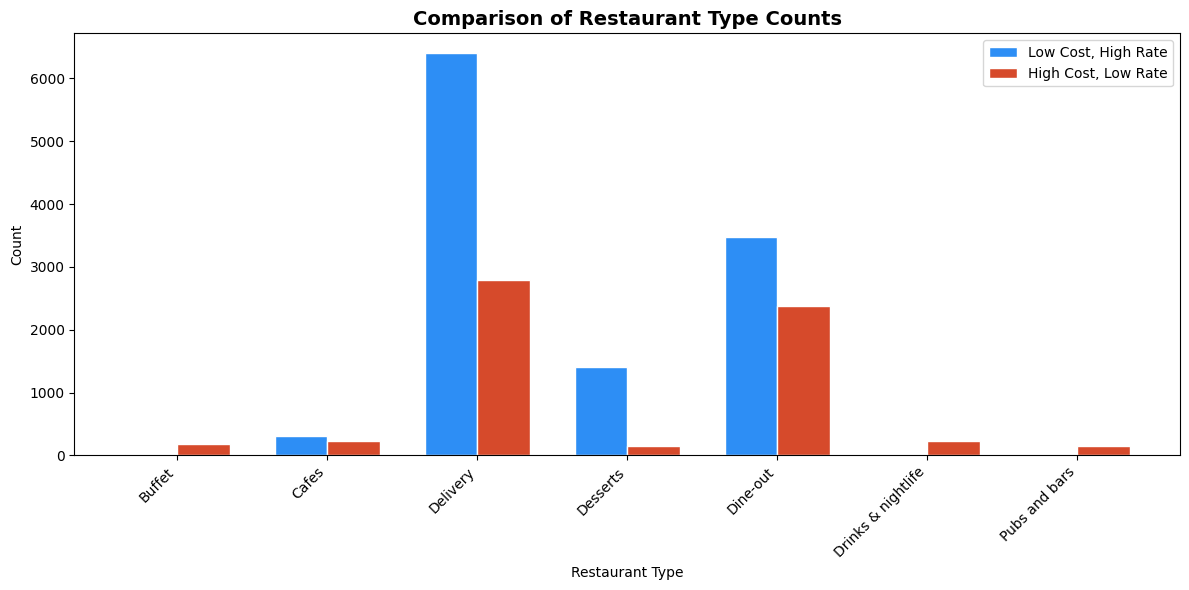

In [64]:
# Create a combined DataFrame for plotting
combined_results = pd.merge(results_low, results_high, left_index=True, right_index=True, suffixes=('_low', '_high'))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35  # Width of the bars
x = range(len(combined_results))

ax.bar([i - width / 2 for i in x], combined_results['Count_low'], width, label='Low Cost, High Rate', edgecolor='white', color='#2d8ef5')
ax.bar([i + width / 2 for i in x], combined_results['Count_high'], width, label='High Cost, Low Rate' , edgecolor='white', color='#d64a2b')


ax.set_xticks(x)
ax.set_xticklabels(combined_results.index, rotation=45, ha='right')  # Rotate x-axis labels
ax.set_xlabel("Restaurant Type")
ax.set_ylabel("Count")
ax.set_title("Comparison of Restaurant Type Counts",fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

Restaurants are segmented based on cost and rating, with low-cost, high-rated restaurants offering good value, and high-cost, low-rated restaurants often failing to meet expectations despite their price. Several factors, including brand reputation, location, marketing, and target market, contribute to these variations.

Restaurants can be categorized based on their cost and rating. Low-cost, high-rated restaurants like buffets, cafes, and delivery services often excel by offering good quality at affordable prices. However, if these low-luxury, high-convenience options charge exorbitant fees, customer satisfaction and ratings decline. Conversely, high-cost, low-rated restaurants, particularly in delivery services, may struggle to justify their prices, as customers expect premium quality and value. Factors such as brand reputation, location, marketing, and target market influence these variations, highlighting the importance of delivering on promises, regardless of the price point.



## Research Question 3: Does the restaurant type affect the number of votes? Do specific types of restauarant types get more engagement than others?

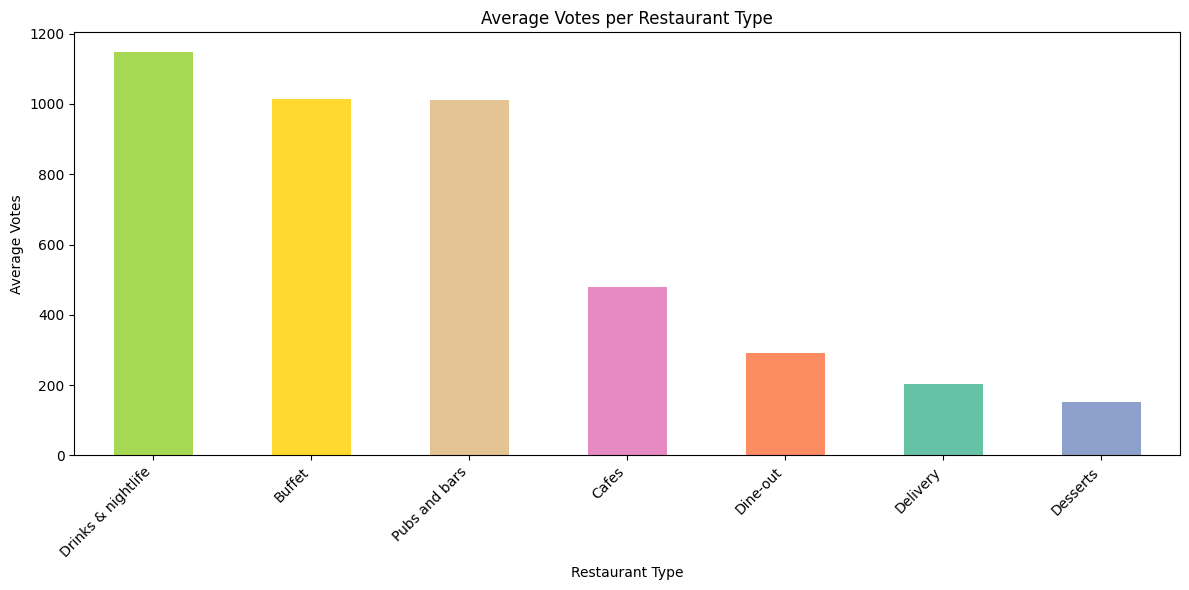

In [65]:
# Group by restaurant type and calculate the mean votes
restaurant_type_votes = df.groupby('listed_in(type)')['votes'].mean()

# Sort the restaurant types by mean votes in descending order
restaurant_type_votes_sorted = restaurant_type_votes.sort_values(ascending=False)
colors = [type_to_color[t] for t in restaurant_type_votes_sorted.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
restaurant_type_votes_sorted.plot(kind='bar', color=colors)

plt.title('Average Votes per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

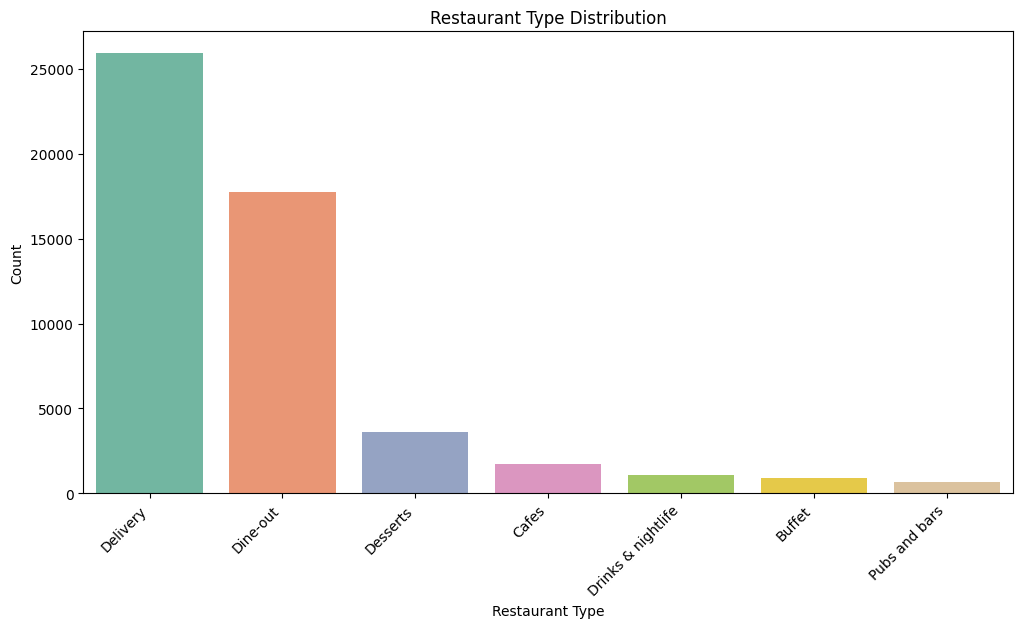

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index, palette=type_to_color)
plt.xticks(rotation=45, ha='right')
plt.title('Restaurant Type Distribution')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

Yes, the restaurant type affects the number of votes. We notice in the distribution of restaurant types that Delivery and  Dine-out are the most common restaurant types while Drinks & Night life and Buffets are among the least abundant restaurant types. However, when we look at the average number of votes per restaurant type we find the opposite results, with the more the restaurant types often considered high-class and luxurious get significantly more votes than convenience-based 'normal' restaurant types.

In a 2013 study, software company Zendesk found that people are more likely to talk about negative experiences rather than positive ones. From their research: 95 percent of users were likely to share bad experiences, while 87 percent would share good experiences.

When we link these findings we notice that since high-class restaurant types often either provide an exceptional experience, or a terrible bank-breaking experience, customers are more likely to vote for these compared to restaurants that do not have this feature.

## Research Question 4: What is the relationship between geographical location of restauarants in cities and online ordering?

In [67]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Calculate percentages of online orders for each city
city_probabilities = df.groupby('listed_in(city)').agg(
    total_restaurants=('online_order', 'count'),
    online_yes=('online_order', lambda x: (x == 1).sum()),
).reset_index()

city_probabilities['online_order_percentage'] = (city_probabilities['online_yes'] / city_probabilities['total_restaurants']) * 100
city_probabilities = city_probabilities.rename(columns={'listed_in(city)': 'city'})

# Initialize the geolocator
geolocator = Nominatim(user_agent="restaurant_map")

# Function to get latitude and longitude from city name
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ", India")  # Adding 'India' for better precision
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Get latitude and longitude for each city
city_probabilities['latitude'], city_probabilities['longitude'] = zip(*city_probabilities['city'].apply(get_coordinates))

# Check for missing coordinates
print(city_probabilities)

# Define color ranges based on percentages
def get_color(percentage):
    if percentage <= 48:
        return 'brown'
    elif percentage <= 54:
        return 'red'
    elif percentage <= 60:
        return 'yellow'
    elif percentage <= 68:
        return 'green'
    else:
        return 'blue'

# Create a base map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker for each city
for idx, row in city_probabilities.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        city = row['city']
        lat = row['latitude']
        lon = row['longitude']
        percentage = row['online_order_percentage']
        restaurants_count = row['total_restaurants']

        # Determine marker color based on percentage
        marker_color = get_color(percentage)

        # Create a popup to display the city's details
        popup_text = (f"{city}<br>"
                      f"Total Restaurants: {restaurants_count}<br>"
                      f"Online Orders Percentage: {percentage:.2f}%")

        # Add a marker to the map
        folium.CircleMarker(
            location=[lat, lon],
            radius=8 + percentage / 10,  # Larger marker sizes
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=popup_text
        ).add_to(india_map)
    else:
        print(f"Could not find coordinates for {row['city']}.")

legend_html = """
     <div style="position: fixed;
                 top: 10px; right: 10px;
                 width: 160px; height: 180px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white; opacity: 0.7;">
     <b>Online Order Percentage Legend</b><br>
     <i style="background-color: brown; width: 18px; height: 18px; display: inline-block;"></i> 0% - 48%<br>
     <i style="background-color: red; width: 18px; height: 18px; display: inline-block;"></i> 49% - 54%<br>
     <i style="background-color: yellow; width: 18px; height: 18px; display: inline-block;"></i> 55% - 60%<br>
     <i style="background-color: green; width: 18px; height: 18px; display: inline-block;"></i> 61% - 68%<br>
     <i style="background-color: blue; width: 18px; height: 18px; display: inline-block;"></i> 69% and above<br>
     </div>
     """
india_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
india_map.save('india map for location of cities vs online ordering.html')


                     city  total_restaurants  online_yes  \
0                     BTM               3278        2131   
1            Banashankari                860         543   
2       Bannerghatta Road               1616        1010   
3            Basavanagudi               1266         794   
4               Bellandur               1226         820   
5            Brigade Road               1769         916   
6             Brookefield               1514         963   
7           Church Street               1827         888   
8         Electronic City               1227         563   
9             Frazer Town               1185         713   
10                    HSR               1740        1186   
11            Indiranagar               1860        1069   
12               JP Nagar               2092        1338   
13              Jayanagar               2371        1589   
14           Kalyan Nagar               1308         780   
15           Kammanahalli               

By looking at the map, we can realize that in big cities, the availability of online ordering is limited in comparison to smaller cities. The more you move away from the center of the city, the more online ordering becomes an available option. In a big city like Mumbai, it's hard to find online ordering especially since it's a crowded big city. However in areas that are away from the city-center, restaurants try to offer online ordering to attract customers from the city-center and increase their reach to improve their business.

## Research Question 5: What is the relationship between geographical location of restauarants in cities and table booking?

In [68]:
# Calculate percentages of online orders for each city
city_probabilities = df.groupby('listed_in(city)').agg(
    total_restaurants=('book_table', 'count'),
    table_yes=('book_table', lambda x: (x == 1).sum()),
).reset_index()

city_probabilities['table_booking_percentage'] = (city_probabilities['table_yes'] / city_probabilities['total_restaurants']) * 100
city_probabilities = city_probabilities.rename(columns={'listed_in(city)': 'city'})

# Initialize the geolocator
geolocator = Nominatim(user_agent="restaurant_map")

# Function to get latitude and longitude from city name
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ", India")  # Adding 'India' for better precision
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Get latitude and longitude for each city
city_probabilities['latitude'], city_probabilities['longitude'] = zip(*city_probabilities['city'].apply(get_coordinates))

# Check for missing coordinates
print(city_probabilities)

# Define color ranges based on percentages
def get_color(percentage):
    if percentage <= 5:
        return 'brown'
    elif percentage <= 10:
        return 'red'
    elif percentage <= 15:
        return 'yellow'
    elif percentage <= 20:
        return 'green'
    else:
        return 'blue'

# Create a base map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker for each city
for idx, row in city_probabilities.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        city = row['city']
        lat = row['latitude']
        lon = row['longitude']
        percentage = row['table_booking_percentage']
        restaurants_count = row['total_restaurants']

        # Determine marker color based on percentage
        marker_color = get_color(percentage)

        # Create a popup to display the city's details
        popup_text = (f"{city}<br>"
                      f"Total Restaurants: {restaurants_count}<br>"
                      f"Table Booking Percentage: {percentage:.2f}%")

        # Add a marker to the map
        folium.CircleMarker(
            location=[lat, lon],
            radius=8 + percentage / 10,  # Larger marker sizes
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=popup_text
        ).add_to(india_map)
    else:
        print(f"Could not find coordinates for {row['city']}.")

legend_html = """
     <div style="position: fixed;
                 top: 10px; right: 10px;
                 width: 160px; height: 180px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white; opacity: 0.7;">
     <b>Table Booking Percentage Legend</b><br>
     <i style="background-color: brown; width: 18px; height: 18px; display: inline-block;"></i> 0% - 5%<br>
     <i style="background-color: red; width: 18px; height: 18px; display: inline-block;"></i> 6% - 10%<br>
     <i style="background-color: yellow; width: 18px; height: 18px; display: inline-block;"></i> 11% - 15%<br>
     <i style="background-color: green; width: 18px; height: 18px; display: inline-block;"></i> 16% - 20%<br>
     <i style="background-color: blue; width: 18px; height: 18px; display: inline-block;"></i> 21% and above<br>
     </div>
     """
india_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
india_map.save('india map for location of cities vs table booking.html')

                     city  total_restaurants  table_yes  \
0                     BTM               3278        381   
1            Banashankari                860         43   
2       Bannerghatta Road               1616        117   
3            Basavanagudi               1266        123   
4               Bellandur               1226        137   
5            Brigade Road               1769        350   
6             Brookefield               1514        124   
7           Church Street               1827        363   
8         Electronic City               1227         96   
9             Frazer Town               1185        129   
10                    HSR               1740        179   
11            Indiranagar               1860        335   
12               JP Nagar               2092        190   
13              Jayanagar               2371        255   
14           Kalyan Nagar               1308        120   
15           Kammanahalli               1327        108 

By looking at the map, we can see that table booking has the exact opposite effect of online ordering. In the city-center, there is abundant table booking because it is crowded. Another reason is that it is better for a restaurant to have table booking to avoid large queue time; hence, lower customer satisfaction. The further away the restaurants are from the city-center, the less available table booking you becomes since there is no load on those restaurants outside the city-center.

## Research Question 6: What is the relationship between geographical location of restauarants in cities and cost?

In [169]:
# Calculate average cost for each city
city_costs = df.groupby('listed_in(city)').agg(
    total_restaurants=('approx_cost(for two people)', 'count'),
    average_cost=('approx_cost(for two people)', 'mean')
).reset_index()

city_costs = city_costs.rename(columns={'listed_in(city)': 'city'})

# Initialize the geolocator
geolocator = Nominatim(user_agent="restaurant_map")

# Function to get latitude and longitude from city name
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ", India")  # Adding 'India' for better precision
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Get latitude and longitude for each city
city_costs['latitude'], city_costs['longitude'] = zip(*city_costs['city'].apply(get_coordinates))

# Check for missing coordinates
print(city_costs)

# Define color ranges based on average cost
def get_color(cost):
    if cost <= 400:
        return 'blue'
    elif cost <= 500:
        return 'green'
    elif cost <= 600:
        return 'yellow'
    elif cost <= 700:
        return 'orange'
    else:
        return 'red'

# Create a base map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker for each city
for idx, row in city_costs.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        city = row['city']
        lat = row['latitude']
        lon = row['longitude']
        average_cost = row['average_cost']
        restaurants_count = row['total_restaurants']

        # Determine marker color based on average cost
        marker_color = get_color(average_cost)

        # Create a popup to display the city's details
        popup_text = (f"{city}<br>"
                      f"Total Restaurants: {restaurants_count}<br>"
                      f"Average Cost for Two People: ₹{average_cost:.2f}")

        # Add a marker to the map
        folium.CircleMarker(
            location=[lat, lon],
            radius=8 + average_cost / 100,  # Larger marker sizes
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=popup_text
        ).add_to(india_map)
    else:
        print(f"Could not find coordinates for {row['city']}.")

legend_html = """
     <div style="position: fixed;
                 top: 10px; right: 10px;
                 width: 160px; height: 180px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white; opacity: 0.7;">
     <b>Cost Legend</b><br>
     <i style="background-color: blue; width: 18px; height: 18px; display: inline-block;"></i> ₹0 - ₹400<br>
     <i style="background-color: green; width: 18px; height: 18px; display: inline-block;"></i> ₹401 - ₹500<br>
     <i style="background-color: yellow; width: 18px; height: 18px; display: inline-block;"></i> ₹501 - ₹600<br>
     <i style="background-color: orange; width: 18px; height: 18px; display: inline-block;"></i> ₹601 - ₹700<br>
     <i style="background-color: red; width: 18px; height: 18px; display: inline-block;"></i> ₹701 and above<br>
     </div>
     """
india_map.get_root().html.add_child(folium.Element(legend_html))


# Save the map to an HTML file
india_map.save('india map for location of cities vs cost.html')


                     city  total_restaurants  average_cost   latitude  \
0                     BTM               3278    495.690826  12.911276   
1            Banashankari                860    402.487209  15.887678   
2       Bannerghatta Road               1616    452.534077  12.873890   
3            Basavanagudi               1266    445.137549  12.941726   
4               Bellandur               1226    551.303279  12.931032   
5            Brigade Road               1769    766.826923  12.972131   
6             Brookefield               1514    521.501323  12.963814   
7           Church Street               1827    772.356164  18.964337   
8         Electronic City               1227    496.669388  12.843645   
9             Frazer Town               1185    558.018628  12.998683   
10                    HSR               1740    487.691422  29.152347   
11            Indiranagar               1860    654.753655  12.973291   
12               JP Nagar               2092    460

The map helps us in understanding how the location of the restaurant affects the cost of purchase as a customer. The city-center is usually the tourist attraction of the city; therefore, it is the area that most people visiting the city will stay at. That's why the cost of going to restaurants there is high. The combined factors of being in the city center, having a lot of customers whether local or as a tourist is really high, which raises the prices. That's why Mumbai's cost is high and Bengaluru's city center cost is also high. The more you move away from the center and reach some suburbs, the lower the prices, since a high price will not attract enough customers to maintain business continuity.

## Research Question 7: What is the relationship between geographical location of restauarants in cities and rate?

In [70]:
# Calculate average rate for each city
city_rates = df.groupby('listed_in(city)').agg(
    total_restaurants=('rate', 'count'),
    average_rate=('rate', 'mean')
).reset_index()

city_rates = city_rates.rename(columns={'listed_in(city)': 'city'})

# Initialize the geolocator
geolocator = Nominatim(user_agent="restaurant_map")

# Function to get latitude and longitude from city name
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ", India")  # Adding 'India' for better precision
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Get latitude and longitude for each city
city_rates['latitude'], city_rates['longitude'] = zip(*city_rates['city'].apply(get_coordinates))

# Check for missing coordinates
print(city_rates)

# Define color ranges based on average rate
def get_color(rate):
    if rate <= 3.5:
        return 'brown'
    elif rate <= 3.6:
        return 'red'
    elif rate <= 3.7:
        return 'yellow'
    elif rate <= 3.8:
        return 'green'
    else:
        return 'blue'

# Create a base map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker for each city
for idx, row in city_rates.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        city = row['city']
        lat = row['latitude']
        lon = row['longitude']
        average_rate = row['average_rate']
        restaurants_count = row['total_restaurants']

        # Determine marker color based on average rate
        marker_color = get_color(average_rate)

        # Create a popup to display the city's details
        popup_text = (f"{city}<br>"
                      f"Total Restaurants: {restaurants_count}<br>"
                      f"Average Rate for Two People: {average_rate:.2f}")

        # Add a marker to the map
        folium.CircleMarker(
            location=[lat, lon],
            radius=8 + average_rate / 100,  # Larger marker sizes
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=popup_text
        ).add_to(india_map)
    else:
        print(f"Could not find coordinates for {row['city']}.")

legend_html = """
     <div style="position: fixed;
                 top: 10px; right: 10px;
                 width: 160px; height: 150px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white; opacity: 0.7;">
     <b>Legend: Rate</b><br>
     <i style="background-color: brown; width: 18px; height: 18px; display: inline-block;"></i> <= 3.5<br>
     <i style="background-color: red; width: 18px; height: 18px; display: inline-block;"></i> 3.6<br>
     <i style="background-color: yellow; width: 18px; height: 18px; display: inline-block;"></i> 3.7<br>
     <i style="background-color: green; width: 18px; height: 18px; display: inline-block;"></i> 3.8<br>
     <i style="background-color: blue; width: 18px; height: 18px; display: inline-block;"></i> > 3.8<br>
     </div>
     """
india_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
india_map.save('india map for location of cities vs rate.html')

                     city  total_restaurants  average_rate   latitude  \
0                     BTM               3278      3.705766  12.911276   
1            Banashankari                860      3.672326  15.887678   
2       Bannerghatta Road               1616      3.566770  12.873890   
3            Basavanagudi               1266      3.706161  12.941726   
4               Bellandur               1226      3.619494  12.931032   
5            Brigade Road               1769      3.800961  12.972131   
6             Brookefield               1514      3.571400  12.963814   
7           Church Street               1827      3.803558  18.964337   
8         Electronic City               1227      3.496496  12.843645   
9             Frazer Town               1185      3.711983  12.998683   
10                    HSR               1740      3.669828  29.152347   
11            Indiranagar               1860      3.738172  12.973291   
12               JP Nagar               2092      3

The map reveals a clear correlation between a restaurant's location and its average rating. Restaurants situated in the city center tend to garner higher ratings compared to those in suburban or peripheral areas. This can be attributed to several factors:

Firstly, city centers are often bustling hubs of activity, attracting a diverse range of customers, including tourists and locals. This high foot traffic can lead to increased visibility, positive word-of-mouth, and a steady stream of reviews. Secondly, the competitive nature of the city-center dining scene often drives restaurants to maintain high standards of food quality, service, and ambiance to attract and retain customers. Additionally, the concentration of culinary talent and innovative cuisine in these areas can contribute to higher ratings.

In contrast, restaurants located in less central areas may face challenges in attracting and retaining customers. Lower foot traffic, less intense competition, and potentially lower expectations from customers can impact their overall rating. However, it's important to note that this is not always the case, as some suburban and rural restaurants may excel in specific areas, such as local cuisine, affordability, or unique atmosphere. Ultimately, a combination of factors, including location, quality, service, and customer experience, influences a restaurant's rating and its ability to thrive in a competitive market.

## Research Question 8: Does having one of Online Ordering or Table Booking as a restaurant option affect the likelihood of having the other?

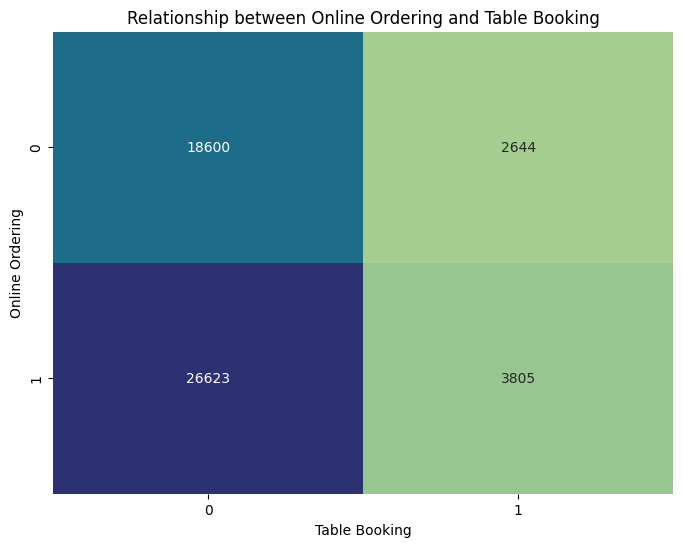

In [71]:
# Create a cross-tabulation of online ordering and table booking
cross_tab = pd.crosstab(df['online_order'], df['book_table'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Relationship between Online Ordering and Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Online Ordering')
plt.show()

Yes, it is clear from the correlation heatmap shown above the following:

1) Having online ordering reduces the need of having table booking so most restaurants opt for that option.
26623 Have only online without table booking while only 3805 have both.

2) When a restaurant has table booking, it is more likely to have Online ordering as well with it than not.
3805 Have online along with booking compared to 2644 with no online along with the table booking.

Both these points raise the point that online ordering is more critical than table booking.

## Research Question 9: What is the relationship between geographical location of restauarants in cities and cuisines?

In [72]:
def top_3_famous_cuisine_per_city(df):
    # Ensure 'cuisines' column exists and handle potential missing values
    if 'cuisines' not in df.columns:
        raise ValueError("The DataFrame must have a 'cuisines' column.")
    df['cuisines'] = df['cuisines'].fillna('')  # Replace NaN with empty string

    # Group by city, then split cuisines and count occurrences
    city_cuisines = df.groupby('listed_in(city)')['cuisines'].apply(
        lambda x: ','.join(x).split(',')
    ).reset_index(name='all_cuisines')

    # Flatten the lists of cuisines and count their frequency in each city
    cuisine_counts = {}
    for index, row in city_cuisines.iterrows():
        city = row['listed_in(city)']
        cuisines = row['all_cuisines']
        cuisine_counts[city] = {}
        for cuisine in cuisines:
            cuisine = cuisine.strip()
            if cuisine:  # Ignore empty strings
                cuisine_counts[city][cuisine] = cuisine_counts[city].get(cuisine, 0) + 1

    # Find the top 3 most famous cuisines for each city
    top_3_famous_cuisines = {}
    for city, cuisines in cuisine_counts.items():
        if cuisines:
            # Sort cuisines by their frequency
            sorted_cuisines = sorted(cuisines.items(), key=lambda item: item[1], reverse=True)
            # Get top 3 cuisines (or fewer if there are not enough)
            top_3_famous_cuisines[city] = [cuisine[0] for cuisine in sorted_cuisines[:3]]

    return top_3_famous_cuisines

# Read the dataset
df2 = pd.read_csv('/content/drive/MyDrive/Uni/dataset/zomato.csv')

# Find the top 3 most famous cuisines per city
cities_top_3_cuisines = top_3_famous_cuisine_per_city(df2)

# Show the resulting DataFrame
cities_top_3_cuisines


{'BTM': ['North Indian', 'Chinese', 'Fast Food'],
 'Banashankari': ['North Indian', 'Chinese', 'South Indian'],
 'Bannerghatta Road': ['North Indian', 'Chinese', 'South Indian'],
 'Basavanagudi': ['North Indian', 'Chinese', 'South Indian'],
 'Bellandur': ['North Indian', 'Chinese', 'Biryani'],
 'Brigade Road': ['North Indian', 'Chinese', 'Continental'],
 'Brookefield': ['North Indian', 'Chinese', 'Biryani'],
 'Church Street': ['North Indian', 'Chinese', 'Continental'],
 'Electronic City': ['North Indian', 'Chinese', 'South Indian'],
 'Frazer Town': ['North Indian', 'Chinese', 'South Indian'],
 'HSR': ['North Indian', 'Chinese', 'Fast Food'],
 'Indiranagar': ['North Indian', 'Chinese', 'Continental'],
 'JP Nagar': ['North Indian', 'Chinese', 'South Indian'],
 'Jayanagar': ['North Indian', 'Chinese', 'Fast Food'],
 'Kalyan Nagar': ['North Indian', 'Chinese', 'Fast Food'],
 'Kammanahalli': ['North Indian', 'Chinese', 'Fast Food'],
 'Koramangala 4th Block': ['North Indian', 'Chinese', 'Fas

In [73]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Function to get coordinates of cities
def get_coordinates(city):
    try:
        location = geolocator.geocode(city + ", India")  # Adding 'India' for better precision
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None

# Function to classify cuisine type and return a color
def classify_cuisine(cuisine):
    cuisine = cuisine.lower()
    if 'fast food' in cuisine:
        return 'red'  # Red for Fast Food
    elif 'south indian' in cuisine:
        return 'green'  # Green for South Indian
    elif 'biryani' in cuisine:
        return 'blue'  # Blue for Biryani
    elif 'continental' in cuisine:
        return 'purple'  # Purple for Continental
    else:
        return 'gray'  # Gray for uncategorized or others

# Initialize the geolocator
geolocator = Nominatim(user_agent="restaurant_map")

# Assuming you've already run the top_3_most_famous_cuisines_per_city function and obtained the cities_top_3_cuisines DataFrame
# For example:
# cities_top_3_cuisines = top_3_most_famous_cuisines_per_city(df2)

# Create a new dataframe for city and cuisine info, specifically for the 3rd most famous cuisine
city_cuisine_data = pd.DataFrame(list(cities_top_3_cuisines.items()), columns=['city', 'top_3_cuisines'])

# Add coordinates to the data
city_cuisine_data['latitude'], city_cuisine_data['longitude'] = zip(*city_cuisine_data['city'].apply(get_coordinates))

# Create a base map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each city with color-coded based on cuisine type
for idx, row in city_cuisine_data.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        city = row['city']
        cuisines = row['top_3_cuisines']
        lat = row['latitude']
        lon = row['longitude']

        # Get the third most famous cuisine (if available)
        third_most_famous_cuisine = cuisines[2] if len(cuisines) > 2 else None

        if third_most_famous_cuisine:
            # Classify the third most famous cuisine to get a color
            color = classify_cuisine(third_most_famous_cuisine)

            # Create a popup to display city and cuisine info
            popup_text = f'{city}: {third_most_famous_cuisine} Cuisine'

            # Add a marker to the map with the selected color
            folium.Marker(
                location=[lat, lon],
                popup=popup_text,
                icon=folium.Icon(color=color, icon='info-sign')
            ).add_to(india_map)


# Add a legend for the cuisine types (Red, Green, Blue, Purple, Gray)
legend_html = '''
    <div style="position: fixed;
                top: 50px; right: 50px; width: 120px; height: 140px;
                border:2px solid grey; background-color: white; opacity: 0.7; z-index:9999; font-size:14px;">
        <b>Legend</b><br>
        <i style="background-color:red; width: 18px; height: 18px; display: inline-block;"></i> Fast Food<br>
        <i style="background-color:green; width: 18px; height: 18px; display: inline-block;"></i> South Indian<br>
        <i style="background-color:blue; width: 18px; height: 18px; display: inline-block;"></i> Biryani<br>
        <i style="background-color:purple; width: 18px; height: 18px; display: inline-block;"></i> Continental<br>
        <i style="background-color:gray; width: 18px; height: 18px; display: inline-block;"></i> Others
    </div>
'''
india_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
india_map.save('india map for location of cities vs cuisines.html')

By looking at the map, we can see the distribution of the fast food, south indian, biryani, contiental cuisine across different restauarants in different cities. City centers in Bengaluru or in Mumbai have a high amount of continental restauarants because these are touristic areas that usually offer many continental food. The whole of the Koramangala area has fast food as a famous cuisine, and that is because this city is mainly a student city, and for students the most affordable and easy-going food is fast food and that is why in all blocks in that city, fast food is dominant. If we look at the whole map of India, the more you go south, the more South Indian restaurants appear and that is why South Indian is not famous in Mumbai or HSR. Areas near the airport have fast food, because that is the best food for dealing for people from different nationalities. Lastly Biryani is famous in suburbs and cities outside the center.

## Research Question 10: Does the brand name of a certain restaurant branch propagate its reputation amongst its branches and cause similar stats in branches of the same restaurant?


In [74]:
# Calculate the number of duplicates in the 'restaurant name' column
duplicate_restaurant_counts = df['name'].value_counts()

# Filter out the unique restaurants (count=1) to get only duplicates
duplicate_restaurants = duplicate_restaurant_counts[duplicate_restaurant_counts > 1]

# Print the number of duplicate restaurants
print("Number of duplicate restaurants:", len(duplicate_restaurants))

# Print the names of duplicate restaurants with their counts
print("\nDuplicate restaurants and their counts:")
duplicate_restaurants

Number of duplicate restaurants: 7709

Duplicate restaurants and their counts:


,count
name,
Cafe Coffee Day,96
Onesta,85
Just Bake,73
Empire Restaurant,71
Five Star Chicken,70
...,...
Momo Corner,2
Seven Star,2
Star Cafe Hotel,2


In [75]:
cafe_coffee_day_rows = df[df['name'] == 'Cafe Coffee Day']
cafe_coffee_day_rows

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
22,Bengaluru,Cafe Coffee Day,0,0,3.6,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 4.0', 'RATED\n This outlet is better...",NaN,Cafes,Banashankari
254,Bengaluru,Cafe Coffee Day,1,0,3.2,17,Jayanagar,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 5.0', 'RATED\n Delicious mouthwateri...",NaN,Delivery,Banashankari
625,Bengaluru,Cafe Coffee Day,0,0,3.7,0,Banashankari,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 4.0', 'RATED\n Had ordered devil?s o...",NaN,Dine-out,Banashankari
889,Bengaluru,Cafe Coffee Day,0,0,3.6,19,Bannerghatta Road,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 4.0', ""RATED\n It is Okay place. Thi...",NaN,Cafes,Bannerghatta Road
1186,Bengaluru,Cafe Coffee Day,1,0,3.7,26,Bannerghatta Road,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 3.0', 'RATED\n What can someone writ...","[""Roasted Chicken 'n' Cheese Multigrain"", 'Dut...",Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Karnataka 560030,Cafe Coffee Day,1,0,3.1,13,Sarjapur Road,Cafe,NaN,"Cafe, Fast Food",900.0,"[('Rated 4.0', 'RATED\n Bestest place for all...","['Tandoori Chicken Multigrain', 'Garlic Bread'...",Dine-out,Sarjapur Road
50119,Bengaluru,Cafe Coffee Day,1,0,3.6,45,Whitefield,Cafe,"Sandwiches, Brownie",Cafe,650.0,"[('Rated 3.0', 'RATED\n Ordered a couple of W...",NaN,Cafes,Whitefield
50282,Bengaluru,Cafe Coffee Day,1,0,3.6,45,Whitefield,Cafe,"Sandwiches, Brownie",Cafe,650.0,"[('Rated 3.0', 'RATED\n Ordered a couple of W...","['Cafe Frappe', 'Tropical Iceberg', 'Crunchy F...",Delivery,Whitefield
51004,Bengaluru,Cafe Coffee Day,0,0,3.6,0,Whitefield,Cafe,NaN,"Cafe, Fast Food",900.0,[],NaN,Desserts,Whitefield



--- Cafe Coffee Day ---
            rate      votes  approx_cost(for two people)
count  96.000000  96.000000                    96.000000
mean    3.307292  32.177083                   844.791667
std     0.350412  24.680269                   105.001044
min     2.300000   0.000000                   600.000000
25%     3.100000  13.000000                   900.000000
50%     3.250000  27.500000                   900.000000
75%     3.600000  48.000000                   900.000000
max     3.800000  97.000000                   900.000000


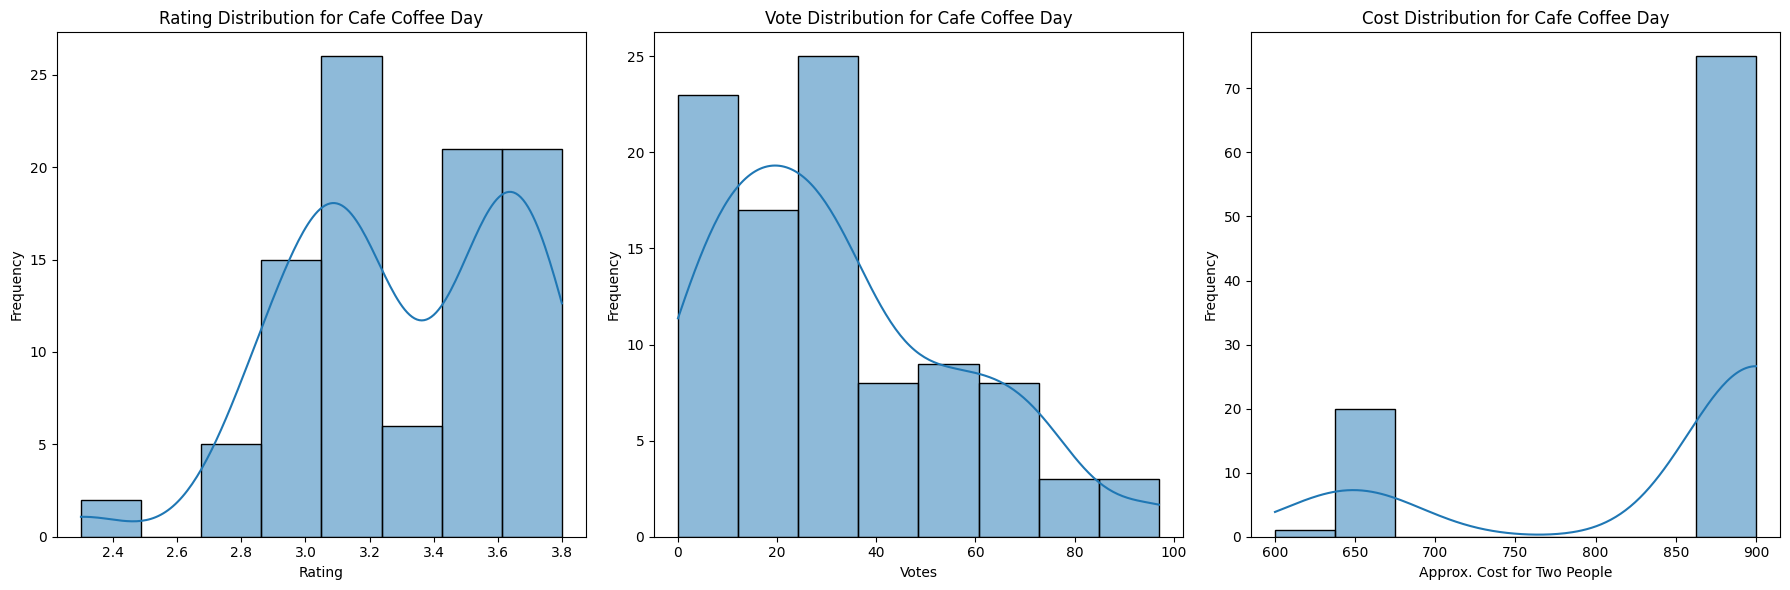


--- Onesta ---
            rate        votes  approx_cost(for two people)
count  85.000000    85.000000                         85.0
mean    4.410588  4088.470588                        600.0
std     0.088672  3026.938810                          0.0
min     4.300000   355.000000                        600.0
25%     4.400000  1755.000000                        600.0
50%     4.400000  3764.000000                        600.0
75%     4.400000  4873.000000                        600.0
max     4.600000  9085.000000                        600.0


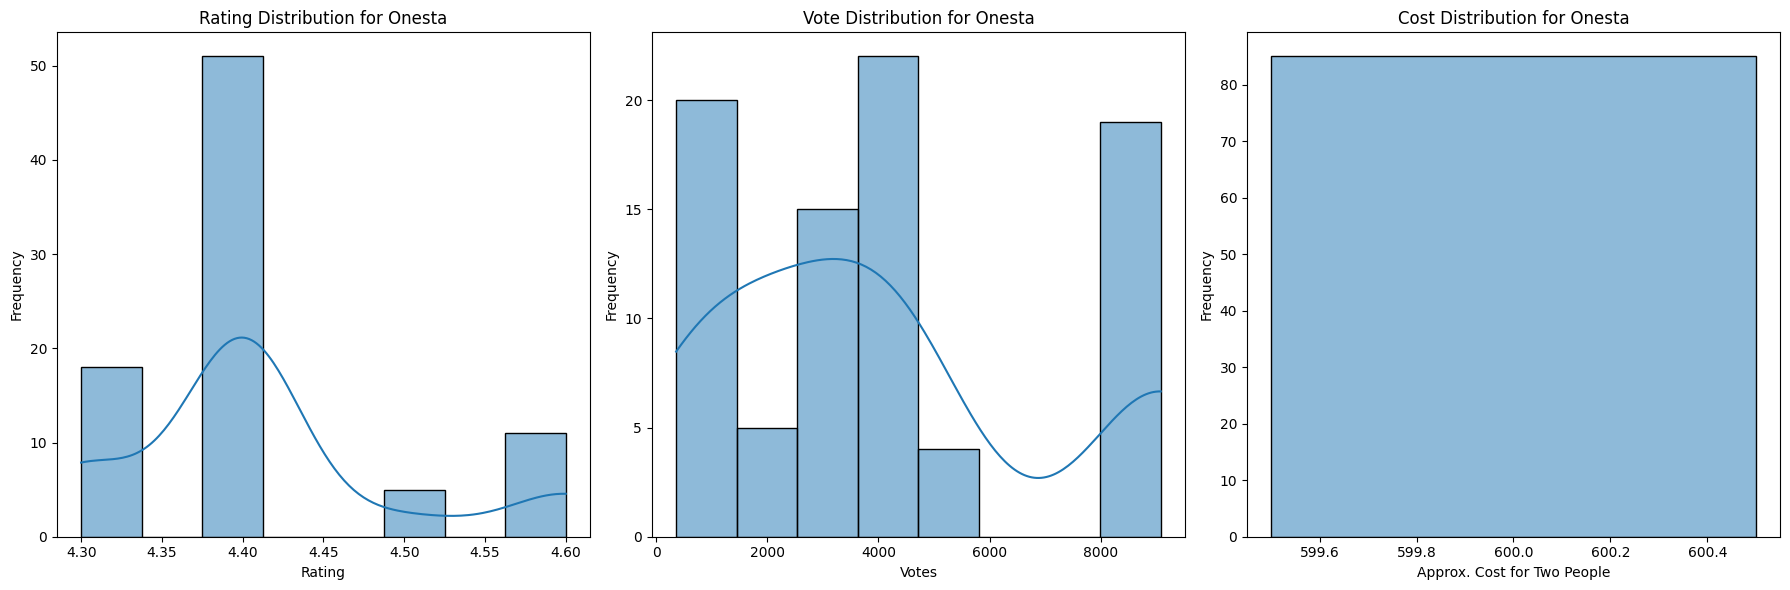


--- Just Bake ---
            rate       votes  approx_cost(for two people)
count  73.000000   73.000000                         73.0
mean    3.426027   39.698630                        400.0
std     0.344411   38.825709                          0.0
min     2.600000    0.000000                        400.0
25%     3.300000   12.000000                        400.0
50%     3.500000   32.000000                        400.0
75%     3.700000   46.000000                        400.0
max     3.800000  154.000000                        400.0


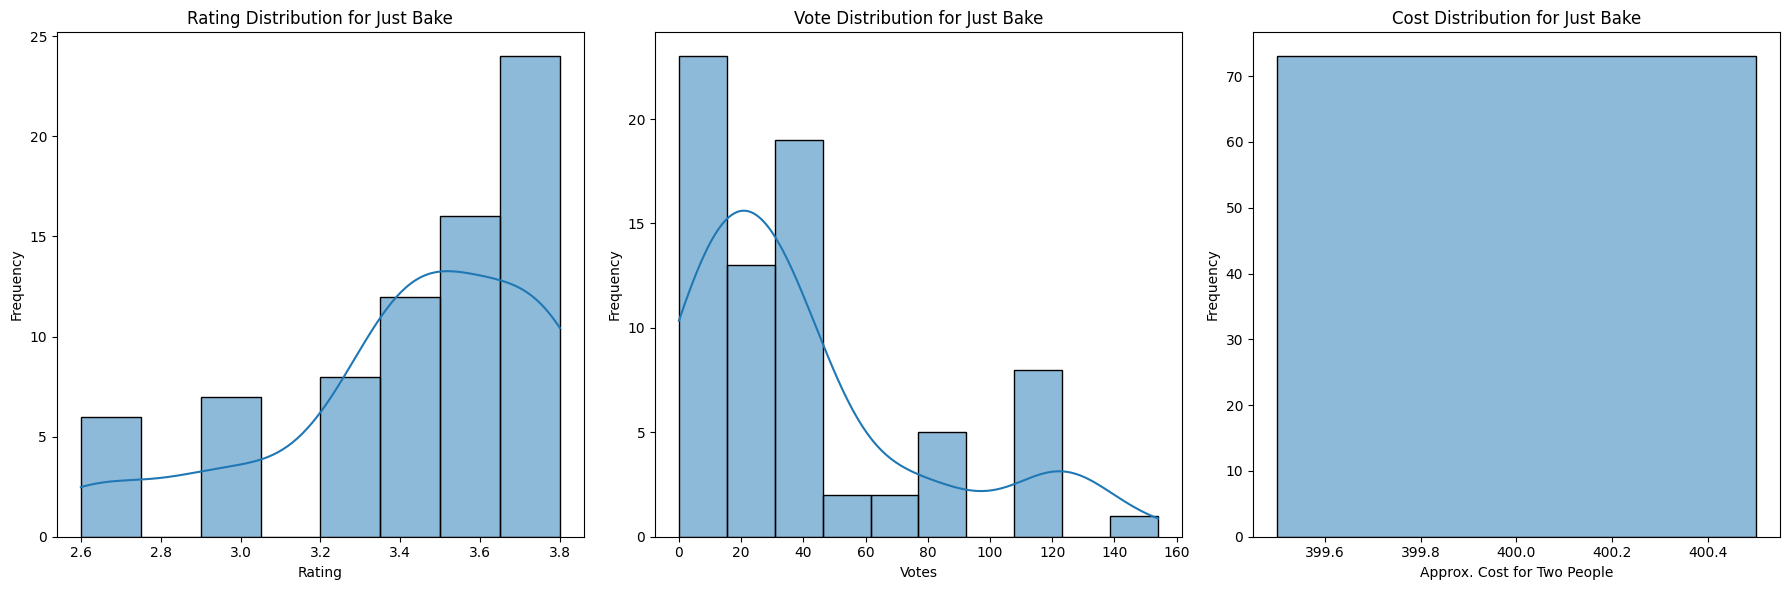


--- Empire Restaurant ---
            rate        votes  approx_cost(for two people)
count  71.000000    71.000000                    71.000000
mean    4.015493  3236.732394                   685.211268
std     0.235219  2592.979329                   136.118217
min     3.500000     0.000000                   400.000000
25%     3.900000   631.500000                   750.000000
50%     4.000000  3128.000000                   750.000000
75%     4.100000  4888.000000                   750.000000
max     4.400000  8304.000000                   750.000000


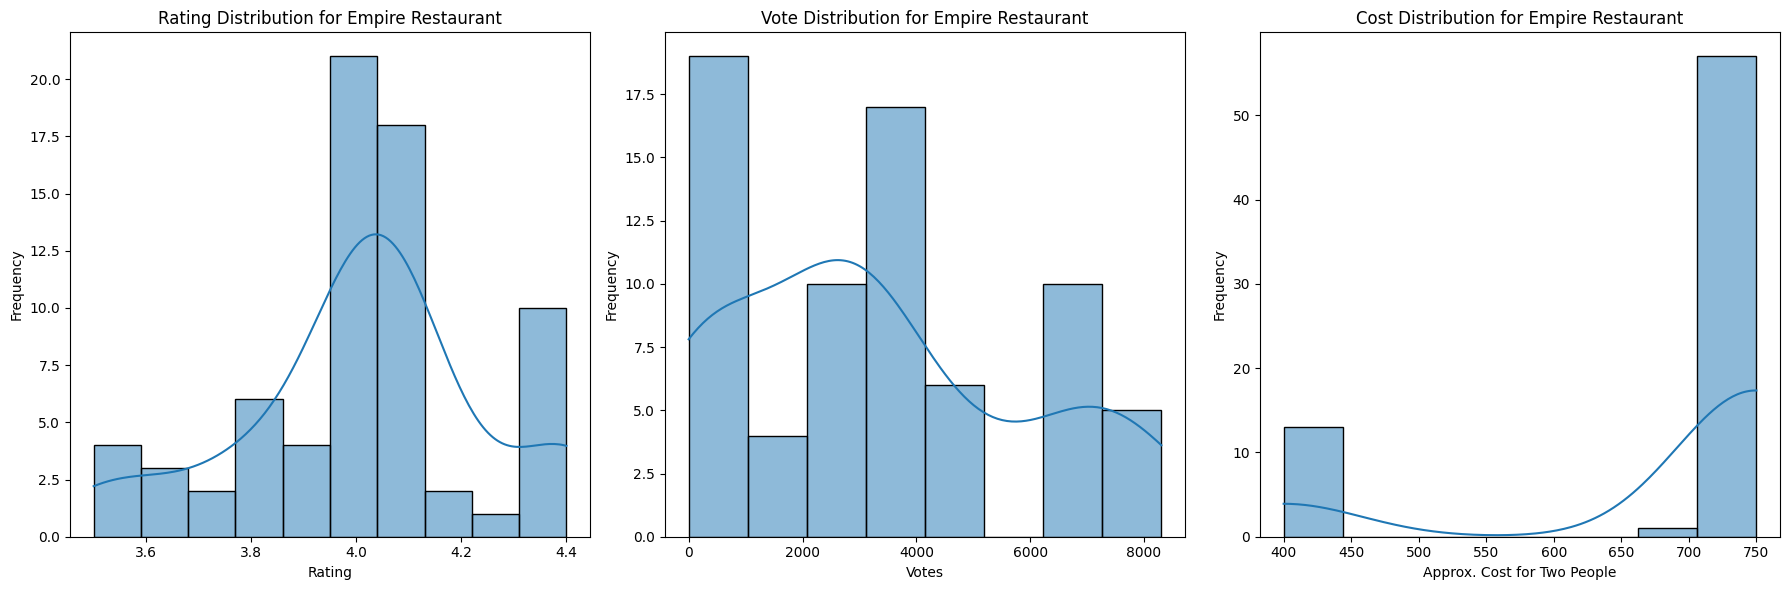


--- Five Star Chicken ---
            rate       votes  approx_cost(for two people)
count  70.000000   70.000000                    70.000000
mean    3.432857   44.771429                   257.857143
std     0.294747   40.569915                    48.630308
min     2.700000    0.000000                   200.000000
25%     3.300000   11.000000                   200.000000
50%     3.500000   38.500000                   300.000000
75%     3.675000   62.000000                   300.000000
max     3.900000  195.000000                   350.000000


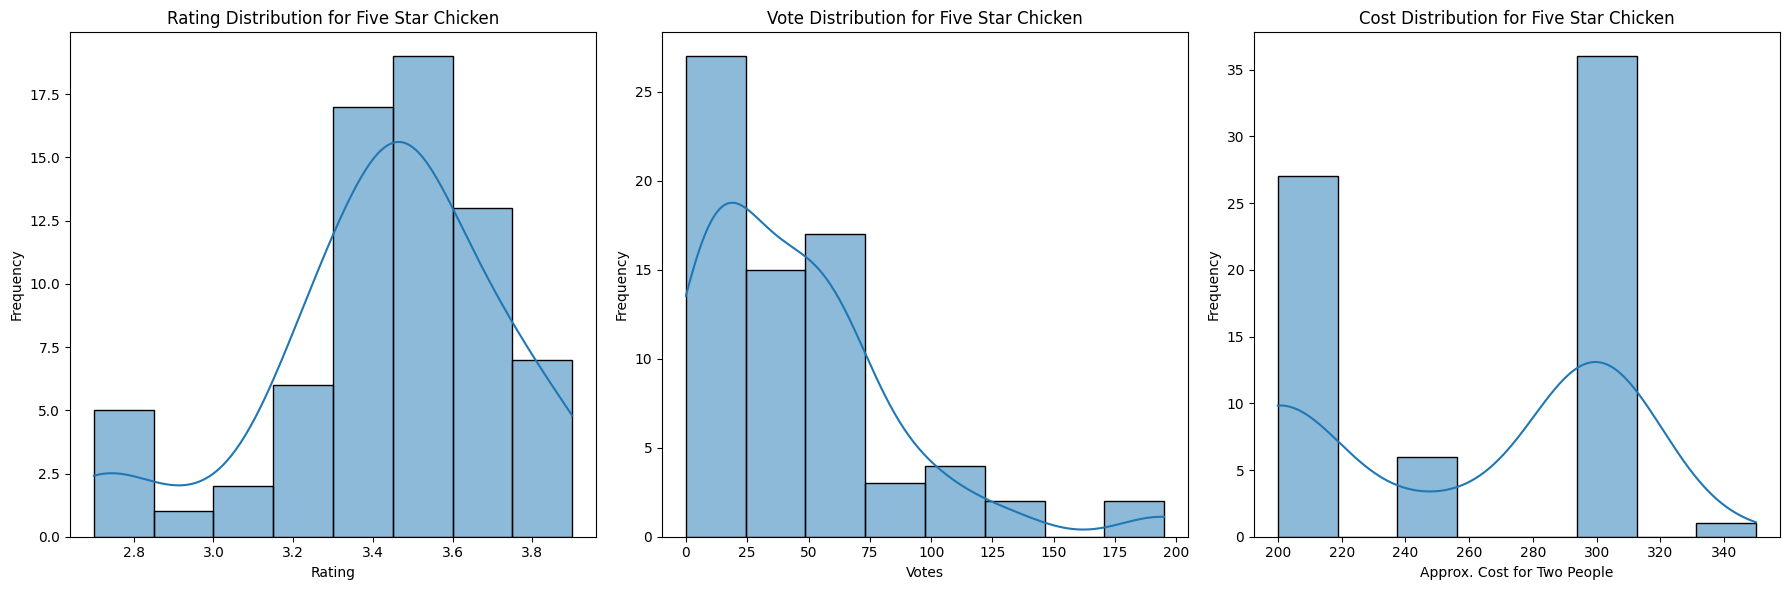

In [76]:
# Calculate the number of branches for each restaurant
restaurant_branch_counts = df['name'].value_counts()

# Filter for restaurants with more than one branch
restaurants_with_multiple_branches = restaurant_branch_counts[restaurant_branch_counts > 1]

# Select the top 5 restaurants with the most branches
top_5_restaurants = restaurants_with_multiple_branches.head(5)

# Iterate through the top 5 restaurants and analyze their branches
for restaurant_name in top_5_restaurants.index:
    # Get the rows corresponding to the current restaurant
    restaurant_branches = df[df['name'] == restaurant_name]

    # Display basic statistics for the branches (rate, votes, cost)
    print(f"\n--- {restaurant_name} ---")
    print(restaurant_branches[['rate', 'votes', 'approx_cost(for two people)']].describe())

    # Create a row of three subplots for distributions
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    # 1. Distribution of rating
    sns.histplot(restaurant_branches['rate'], kde=True, ax=axes[0])
    axes[0].set_title(f'Rating Distribution for {restaurant_name}')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Frequency')

    # 2. Distribution of votes
    sns.histplot(restaurant_branches['votes'], kde=True, ax=axes[1])
    axes[1].set_title(f'Vote Distribution for {restaurant_name}')
    axes[1].set_xlabel('Votes')
    axes[1].set_ylabel('Frequency')

    # 3. Distribution of cost
    sns.histplot(restaurant_branches['approx_cost(for two people)'], kde=True, ax=axes[2])
    axes[2].set_title(f'Cost Distribution for {restaurant_name}')
    axes[2].set_xlabel('Approx. Cost for Two People')
    axes[2].set_ylabel('Frequency')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


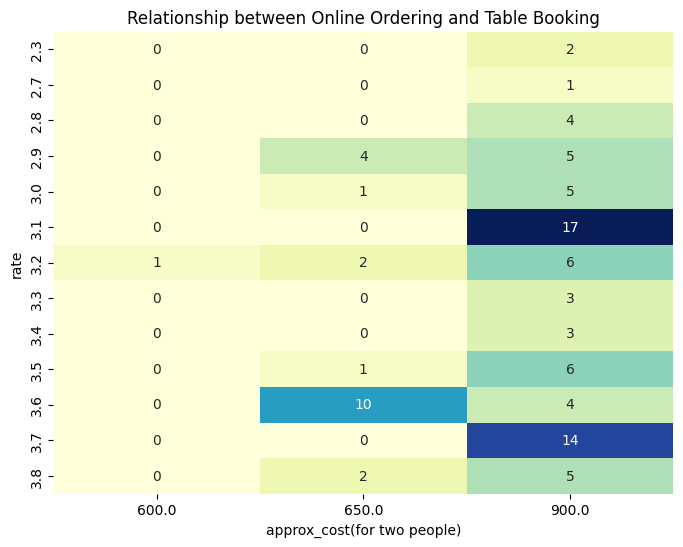

In [77]:
branches = df[df['name'] == "Cafe Coffee Day"]

cross_tab = pd.crosstab(branches['rate'], branches['approx_cost(for two people)'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Relationship between Online Ordering and Table Booking')
plt.show()

As we take a look at the wonderful efforts made above to discover any kind of regular relationship between the different branches of the same restaurant, we notice none. This indicates that the variations in voting, rating, and cost have been significantly more strongly affected by factors such as branch location, employee skills, touristic foot-print and others compared to the effects that may be attributed to having the same brand name. We notice that since expensive restaurant types often either provide an exceptional experience, or a terrible bank-breaking experience, customers are more likely to rate either very high or very low ratings. However for more affordable restaurants, we see that the ratings are usually more average. This is shown for a restaurant of the same brand name which means this effect even occurs within the same restaurant but different branches.

For example, Cafe Coffee Day has around 96 branches, yet the ratings and cost don't show normal distrubtion. Both have bimodal distribution. If we look at high cost (900) we realize that two modes in rate appear, and this can be explained by the conclusion we reached above, which is that when cost is high, people will either find the restauarnt exceptional or terrible, making them rate it.

# Final Conclusion and Summary





### Descriptive Steps Used for the Work Done

This project involved the following steps:

*   **Data Loading and preliminary exploration:** The Zomato dataset was loaded into a Pandas DataFrame using the `pd.read_csv()` function. The dataset was explored using various Pandas functions to understand the data structure, identify missing values, and gain a preliminary understanding of the data distribution.
*   **Data Cleaning:** Several data cleaning steps were performed to prepare the data for analysis, including:
    *   Cleaning the address column to only include the city.
    *   Dropping unnecessary columns such as 'url' and 'phone.'
    *   Cleaning the 'rate' column to remove non-numeric values and convert it to a float data type.
    *   Cleaning the 'menu item' column by replacing empty square brackets with NaN values.
    *   Imputing missing values in 'rate' using the city average.
    *   Imputing missing values in 'location' using the 'listed\_in(city)' column.
    *   Imputing missing values in 'rest\_type' using the 'listed\_in(type)' column.
    *   Dropping rows with missing values in 'cuisines'.
    *   Cleaning and imputing missing values in 'approx\_cost(for two people).'
    *   Converting boolean features to integers and ensuring numeric data types.

*   **Exploratory Data Analysis (EDA):**
    *   Correlation analysis of numeric features using pairplots and heatmaps.
    *   Outlier analysis to identify and quantify outliers.
    *   Distribution analysis of boolean features.
    *   Analysis of location versus count, rate, and cost.
    *   Restaurant type distribution analysis.
*   **Visualization and Research Questions:** Several research questions were formulated and answered using visualizations. The visualizations included:
    *   Quadrant charts to segment restaurants based on cost and rate.
    *   Bar charts to compare restaurant type counts in different cost and rate segments.
    *   Bar charts to analyze the average votes per restaurant type.
    *   Maps to explore the geographical distribution of online ordering, table booking, cost, rate, and cuisine types.



### Data Exploration Questions

Here are some example data exploration questions that were addressed in the sources:
*   What contributes to a high rate in major cities?
*   How are restaurants segmented based on cost and rate? Why are there high-priced low-rated restaurants and why are there low-priced high-rated restaurants?
*   Does the restaurant type affect the number of votes? Do specific types of restaurant types get more engagement than others?
*   What is the relationship between the geographical location of restaurants in cities and online ordering?
*   What is the relationship between the geographical location of restaurants in cities and table booking?
*   What is the relationship between the geographical location of restaurants in cities and cost?
*   What is the relationship between the geographical location of restaurants in cities and rate?
*   Does having one of Online Ordering or Table Booking as a restaurant option affect the likelihood of having the other?
*   What is the relationship between the geographical location of restaurants in cities and cuisines?
*   Does the brand name of a certain restaurant branch propagate its reputation amongst its branches and cause similar stats in branches of the same restaurant?



### Final Insights

The analysis of the Zomato dataset provided valuable insights into the Indian restaurant industry. Some key insights include:

*   **Impact of restaurant type on rate**: Cities that have the highest rate usually tend to have the highest number of drinks & nightlife restaurants. These help in maintaining a high rate in the city since drinks & nightlife have the highest rating in the highest rated cities.
*   **Restaurant segmentation**: Restaurants can be segmented based on cost and rating. Low-cost, high-rated restaurants often excel by offering good quality at affordable prices, while high-cost, low-rated restaurants struggle to justify their prices.
*   **Impact of restaurant type**: Restaurant type significantly influences customer engagement, with high-class restaurants receiving more votes than convenience-based ones, possibly due to customers' tendency to share extreme experiences.
*   **Geographical influence**: Location plays a crucial role in restaurant success. Online ordering is more prevalent in suburban areas, while table booking is more common in city centers. The city center generally has higher costs due to higher demand and tourist traffic.
*   **Relationship between online ordering and table booking**: The availability of online ordering reduces the need for table booking, suggesting a shift in customer preferences towards online services.
*   **Cuisine distribution**: The geographical distribution of cuisines reflects local preferences and demographics. Continental cuisine is prominent in tourist areas, fast food dominates student areas, and South Indian cuisine is more prevalent in southern India.
*   **Restaurant branches**: Branches of the same restauarant don't have any significant relationship. This is due to the fact that quality and prices are not consistent among branches.

